In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [2]:
#eda libraries 

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

#arima model libraries 

from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from pmdarima import auto_arima, ARIMA, model_selection
import numpy as np
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.stattools import adfuller
import seaborn as sns


In [3]:
df_0=pd.read_csv("banknifty_5_min_with_ind.csv")

df_0.head()

date     close      high       low      open  volume  \
0  2015-01-09 14:30:00+05:30  18519.75  18555.30  18504.20  18543.15       0   
1  2015-01-09 14:35:00+05:30  18562.80  18562.80  18519.75  18519.75       0   
2  2015-01-09 14:40:00+05:30  18579.55  18585.50  18544.70  18562.80       0   
3  2015-01-09 14:45:00+05:30  18575.35  18586.75  18557.05  18570.35       0   
4  2015-01-09 14:50:00+05:30  18613.50  18630.15  18575.35  18575.35       0   

       sma5      sma10         sma15       sma20  ...      fastd     fastksr  \
0  18531.34  18536.755  18555.436667  18568.0875  ...  52.590777   58.193785   
1  18541.07  18534.800  18553.170000  18563.8400  ...  62.559047  100.000000   
2  18547.54  18534.585  18551.796667  18561.9000  ...  72.524534  100.000000   
3  18555.80  18540.210  18550.360000  18559.5925  ...  89.280885   93.833477   
4  18570.19  18550.915  18552.043333  18561.9700  ...  88.550694  100.000000   

     fastdsr     ULTOSC      WILLR        ATR  Trange      TYPPRICE  \
0  79.677031  52.084051 -68.287861  35.354720   51.10  18526.416667   
1  85.410749  56.719836 -34.112520  35.904382   43.05  18548.450000   
2  86.064595  59.507476 -15.231226  36.254069   40.80  18569.916667   
3  97.944492  61.984766 -18.795078  35.785922   29.70  18573.050000   
4  97.944492  58.960874 -11.063123  37.144070   54.80  18606.333333   

   HT_DCPERIOD      BETA  
0    23.549276  0.447165  
1    23.214823  0.468669  
2    22.690038  0.677242  
3    22.218714  0.389044  
4    21.951435  0.304212  

[5 rows x 60 columns]

In [4]:
df_0.tail()

date    close      high       low      open  \
136134  2022-10-21 15:05:00+05:30  40757.5  40758.95  40705.45  40705.45   
136135  2022-10-21 15:10:00+05:30  40743.3  40778.40  40740.35  40760.00   
136136  2022-10-21 15:15:00+05:30  40817.1  40826.65  40739.10  40744.85   
136137  2022-10-21 15:20:00+05:30  40873.9  40873.90  40790.20  40816.20   
136138  2022-10-21 15:25:00+05:30  40881.6  40897.65  40848.50  40873.20   

        volume      sma5      sma10         sma15       sma20  ...      fastd  \
136134       0  40684.10  40690.850  40716.973333  40757.6975  ...  81.570070   
136135       0  40703.43  40687.805  40710.593333  40746.4750  ...  86.826321   
136136       0  40741.21  40703.700  40713.640000  40743.1400  ...  91.066504   
136137       0  40779.36  40721.645  40725.913333  40745.8925  ...  91.392860   
136138       0  40814.68  40738.875  40735.010000  40745.8925  ...  95.592292   

           fastksr     fastdsr     ULTOSC      WILLR        ATR  Trange  \
136134  100.000000  100.000000  49.099306 -36.856835  67.071983   53.95   
136135   90.377348   96.792449  45.000107 -37.538316  64.998985   38.05   
136136  100.000000   96.792449  56.010406  -4.425394  66.609771   87.55   
136137  100.000000   96.792449  63.236350  -0.000000  67.830502   83.70   
136138  100.000000  100.000000  64.949909  -5.596234  66.496180   49.15   

            TYPPRICE  HT_DCPERIOD      BETA  
136134  40740.633333    27.892335  0.596826  
136135  40754.016667    27.807368  0.686352  
136136  40794.283333    27.374338 -0.361515  
136137  40846.000000    26.823269 -0.057402  
136138  40875.916667    26.613559 -0.722902  

[5 rows x 60 columns]

In [5]:
df_0.tail()

date    close      high       low      open  \
136134  2022-10-21 15:05:00+05:30  40757.5  40758.95  40705.45  40705.45   
136135  2022-10-21 15:10:00+05:30  40743.3  40778.40  40740.35  40760.00   
136136  2022-10-21 15:15:00+05:30  40817.1  40826.65  40739.10  40744.85   
136137  2022-10-21 15:20:00+05:30  40873.9  40873.90  40790.20  40816.20   
136138  2022-10-21 15:25:00+05:30  40881.6  40897.65  40848.50  40873.20   

        volume      sma5      sma10         sma15       sma20  ...      fastd  \
136134       0  40684.10  40690.850  40716.973333  40757.6975  ...  81.570070   
136135       0  40703.43  40687.805  40710.593333  40746.4750  ...  86.826321   
136136       0  40741.21  40703.700  40713.640000  40743.1400  ...  91.066504   
136137       0  40779.36  40721.645  40725.913333  40745.8925  ...  91.392860   
136138       0  40814.68  40738.875  40735.010000  40745.8925  ...  95.592292   

           fastksr     fastdsr     ULTOSC      WILLR        ATR  Trange  \
136134  100.000000  100.000000  49.099306 -36.856835  67.071983   53.95   
136135   90.377348   96.792449  45.000107 -37.538316  64.998985   38.05   
136136  100.000000   96.792449  56.010406  -4.425394  66.609771   87.55   
136137  100.000000   96.792449  63.236350  -0.000000  67.830502   83.70   
136138  100.000000  100.000000  64.949909  -5.596234  66.496180   49.15   

            TYPPRICE  HT_DCPERIOD      BETA  
136134  40740.633333    27.892335  0.596826  
136135  40754.016667    27.807368  0.686352  
136136  40794.283333    27.374338 -0.361515  
136137  40846.000000    26.823269 -0.057402  
136138  40875.916667    26.613559 -0.722902  

[5 rows x 60 columns]

In [6]:
df_0.shape

(136139, 60)

In [7]:
df_0= df_0.drop(columns=['MFI'])


In [8]:
df_0.shape

(136139, 59)

In [9]:
df=df_0[df_0.date > '2015-01-12 00:00:00+05:30']

In [10]:
df.shape

(136127, 59)

In [11]:
df.head()

date     close      high      low      open  volume  \
12  2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00       0   
13  2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15       0   
14  2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00       0   
15  2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45       0   
16  2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75       0   

        sma5      sma10         sma15       sma20  ...      fastd    fastksr  \
12  18619.69  18612.290  18590.706667  18573.4375  ...  27.757822   0.000000   
13  18596.28  18609.355  18591.503333  18574.7825  ...  15.808949   0.000000   
14  18579.36  18604.050  18592.763333  18577.4825  ...  18.743153  19.197614   
15  18566.68  18601.850  18596.096667  18579.9075  ...  25.036883  57.719858   
16  18559.88  18597.695  18596.180000  18582.4025  ...  32.156081  79.053088   

         fastdsr     ULTOSC      WILLR        ATR  Trange      TYPPRICE  \
12  8.427208e+00  45.918057 -68.446741  41.926807  101.90  18573.750000   
13  1.184238e-14  42.061691 -75.997703  41.732035   39.20  18559.066667   
14  6.399205e+00  42.443628 -74.337957  41.176175   33.95  18553.066667   
15  2.563916e+01  43.929576 -73.254637  41.035020   39.20  18558.850000   
16  5.199019e+01  42.057687 -77.099494  39.007518   12.65  18568.033333   

    HT_DCPERIOD      BETA  
12    21.334048  0.982710  
13    21.753220 -1.153971  
14    22.013101 -1.229017  
15    22.095481 -0.604320  
16    22.217191 -0.273776  

[5 rows x 59 columns]

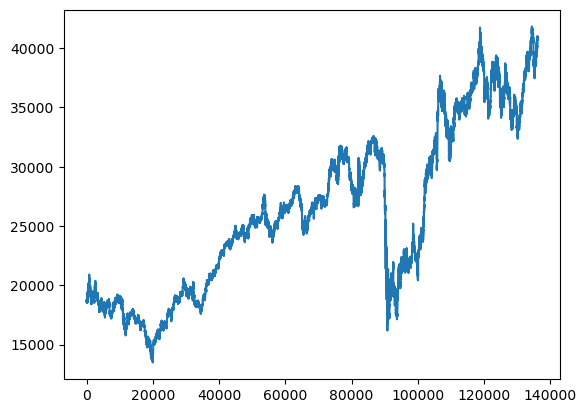

In [12]:
plt.plot(df.index, df['close'], label='Close')

In [13]:
df.nunique()

date            136127
close           115524
high            115419
low             115354
open            115684
volume               1
sma5            135750
sma10           135486
sma15           135818
sma20           135871
ema5            136127
ema10           136127
ema15           136127
ema20           136127
upperband       136042
middleband      135750
lowerband       136042
HT_TRENDLINE    136126
KAMA10          136127
KAMA20          136127
KAMA30          136127
SAR                  4
TRIMA5          136127
TRIMA10         136082
TRIMA20         136109
ADX5            136127
ADX10           136127
ADX20           136127
APO             135088
CCI5            134160
CCI10           136099
CCI15           136120
macd510         136127
macd520         136127
macd1020        136127
macd1520        136127
macd1226        136127
MOM10            28026
MOM15            31922
MOM20            34939
ROC5            136003
ROC10           136050
ROC20           136067
PPO        

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136127 entries, 12 to 136138
Data columns (total 59 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   date          136127 non-null  object 
 1   close         136127 non-null  float64
 2   high          136127 non-null  float64
 3   low           136127 non-null  float64
 4   open          136127 non-null  float64
 5   volume        136127 non-null  int64  
 6   sma5          136127 non-null  float64
 7   sma10         136127 non-null  float64
 8   sma15         136127 non-null  float64
 9   sma20         136127 non-null  float64
 10  ema5          136127 non-null  float64
 11  ema10         136127 non-null  float64
 12  ema15         136127 non-null  float64
 13  ema20         136127 non-null  float64
 14  upperband     136127 non-null  float64
 15  middleband    136127 non-null  float64
 16  lowerband     136127 non-null  float64
 17  HT_TRENDLINE  136127 non-null  float64
 18  KAMA10  

dataset has banknifty 5 min data with various indicator values from 12/01/15 to 21/10/22

In [16]:
#convert date into datetime and set as index

In [17]:
df.set_index('date', inplace= True)
df.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00       0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15       0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00       0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45       0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75       0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...      fastd    fastksr  \
date                                     ...                         
2015-01-12 09:15:00+05:30  18600.314495  ...  27.757822   0.000000   
2015-01-12 09:20:00+05:30  18582.209664  ...  15.808949   0.000000   
2015-01-12 09:25:00+05:30  18574.956442  ...  18.743153  19.197614   
2015-01-12 09:30:00+05:30  18573.220962  ...  25.036883  57.719858   
2015-01-12 09:35:00+05:30  18570.163974  ...  32.156081  79.053088   

                                fastdsr     ULTOSC      WILLR        ATR  \
date                                                                       
2015-01-12 09:15:00+05:30  8.427208e+00  45.918057 -68.446741  41.926807   
2015-01-12 09:20:00+05:30  1.184238e-14  42.061691 -75.997703  41.732035   
2015-01-12 09:25:00+05:30  6.399205e+00  42.443628 -74.337957  41.176175   
2015-01-12 09:30:00+05:30  2.563916e+01  43.929576 -73.254637  41.035020   
2015-01-12 09:35:00+05:30  5.199019e+01  42.057687 -77.099494  39.007518   

                           Trange      TYPPRICE  HT_DCPERIOD      BETA  
date                                                                    
2015-01-12 09:15:00+05:30  101.90  18573.750000    21.334048  0.982710  
2015-01-12 09:20:00+05:30   39.20  18559.066667    21.753220 -1.153971  
2015-01-12 09:25:00+05:30   33.95  18553.066667    22.013101 -1.229017  
2015-01-12 09:30:00+05:30   39.20  18558.850000    22.095481 -0.604320  
2015-01-12 09:35:00+05:30   12.65  18568.033333    22.217191 -0.273776  

[5 rows x 58 columns]

In [18]:
df.index=pd.to_datetime(df.index)

In [19]:
print(df.index.dtype)

datetime64[ns, UTC+05:30]


In [20]:
#selecting for a speicific year
df.loc['2017']

close      high       low      open  volume  \
date                                                                        
2017-01-06 09:15:00+05:30  18170.30  18190.00  18157.35  18168.45       0   
2017-01-06 09:20:00+05:30  18214.00  18216.90  18165.85  18170.65       0   
2017-01-06 09:25:00+05:30  18235.60  18243.95  18214.25  18214.25       0   
2017-01-06 09:30:00+05:30  18226.90  18241.30  18218.70  18236.95       0   
2017-01-06 09:35:00+05:30  18245.30  18245.45  18221.45  18226.70       0   
...                             ...       ...       ...       ...     ...   
2017-12-29 15:05:00+05:30  25543.60  25547.95  25531.15  25543.05       0   
2017-12-29 15:10:00+05:30  25552.30  25556.85  25537.90  25541.55       0   
2017-12-29 15:15:00+05:30  25528.65  25557.95  25520.95  25552.50       0   
2017-12-29 15:20:00+05:30  25557.25  25562.85  25522.65  25528.00       0   
2017-12-29 15:25:00+05:30  25530.55  25561.30  25530.55  25556.90       0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2017-01-06 09:15:00+05:30  18165.52  18190.265  18194.693333  18196.0125   
2017-01-06 09:20:00+05:30  18172.61  18188.505  18198.170000  18195.9500   
2017-01-06 09:25:00+05:30  18184.57  18189.230  18201.293333  18197.0275   
2017-01-06 09:30:00+05:30  18199.26  18190.910  18202.190000  18198.0700   
2017-01-06 09:35:00+05:30  18218.42  18194.305  18202.903333  18200.3725   
...                             ...        ...           ...         ...   
2017-12-29 15:05:00+05:30  25525.10  25528.360  25532.503333  25531.8900   
2017-12-29 15:10:00+05:30  25536.38  25529.900  25533.493333  25533.2675   
2017-12-29 15:15:00+05:30  25539.20  25529.810  25532.723333  25533.4775   
2017-12-29 15:20:00+05:30  25545.52  25533.040  25533.396667  25534.4875   
2017-12-29 15:25:00+05:30  25542.47  25533.435  25532.503333  25533.9250   

                                   ema5  ...      fastd     fastksr  \
date                                     ...                          
2017-01-06 09:15:00+05:30  18169.270021  ...  29.534853  100.000000   
2017-01-06 09:20:00+05:30  18184.180014  ...  57.652042  100.000000   
2017-01-06 09:25:00+05:30  18201.320009  ...  81.820429  100.000000   
2017-01-06 09:30:00+05:30  18209.846673  ...  91.162804   89.548488   
2017-01-06 09:35:00+05:30  18221.664449  ...  92.267211  100.000000   
...                                 ...  ...        ...         ...   
2017-12-29 15:05:00+05:30  25534.081302  ...  86.057764   95.633335   
2017-12-29 15:10:00+05:30  25540.154201  ...  94.730837  100.000000   
2017-12-29 15:15:00+05:30  25536.319468  ...  76.307367    0.000000   
2017-12-29 15:20:00+05:30  25543.296312  ...  74.132190   95.578712   
2017-12-29 15:25:00+05:30  25539.047541  ...  50.528042    3.079627   

                              fastdsr     ULTOSC      WILLR        ATR  \
date                                                                     
2017-01-06 09:15:00+05:30   33.333333  45.515642 -67.232901  23.457200   
2017-01-06 09:20:00+05:30   66.666667  50.206183 -28.162718  25.428115   
2017-01-06 09:25:00+05:30  100.000000  54.316648  -8.851140  25.751106   
2017-01-06 09:30:00+05:30   96.516163  54.994444 -16.629414  25.526027   
2017-01-06 09:35:00+05:30   96.516163  60.734188  -0.134168  25.417025   
...                               ...        ...        ...        ...   
2017-12-29 15:05:00+05:30   88.281481  54.535697 -21.366954  21.208177   
2017-12-29 15:10:00+05:30   98.544445  56.799988  -9.820836  21.046879   
2017-12-29 15:15:00+05:30   65.211112  50.704920 -41.207697  22.186388   
2017-12-29 15:20:00+05:30   65.192904  62.413460  -7.133758  23.473074   
2017-12-29 15:25:00+05:30   32.886113  52.978468 -41.146497  23.992855   

                           Trange      TYPPRICE  HT_DCPERIOD      BETA  
date                                                                    
2017-0

In [21]:
#resample to weekly or monthly frequency and getting the mean closing price 
df.resample('5T').mean()

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/2045016096.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.resample('5T').mean()


close      high       low      open  volume  \
date                                                                        
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.10  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.00  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.40  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.80  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.70  18569.75     0.0   
...                             ...       ...       ...       ...     ...   
2022-10-21 15:05:00+05:30  40757.50  40758.95  40705.45  40705.45     0.0   
2022-10-21 15:10:00+05:30  40743.30  40778.40  40740.35  40760.00     0.0   
2022-10-21 15:15:00+05:30  40817.10  40826.65  40739.10  40744.85     0.0   
2022-10-21 15:20:00+05:30  40873.90  40873.90  40790.20  40816.20     0.0   
2022-10-21 15:25:00+05:30  40881.60  40897.65  40848.50  40873.20     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   
...                             ...        ...           ...         ...   
2022-10-21 15:05:00+05:30  40684.10  40690.850  40716.973333  40757.6975   
2022-10-21 15:10:00+05:30  40703.43  40687.805  40710.593333  40746.4750   
2022-10-21 15:15:00+05:30  40741.21  40703.700  40713.640000  40743.1400   
2022-10-21 15:20:00+05:30  40779.36  40721.645  40725.913333  40745.8925   
2022-10-21 15:25:00+05:30  40814.68  40738.875  40735.010000  40745.8925   

                                   ema5  ...      fastd     fastksr  \
date                                     ...                          
2015-01-12 09:15:00+05:30  18600.314495  ...  27.757822    0.000000   
2015-01-12 09:20:00+05:30  18582.209664  ...  15.808949    0.000000   
2015-01-12 09:25:00+05:30  18574.956442  ...  18.743153   19.197614   
2015-01-12 09:30:00+05:30  18573.220962  ...  25.036883   57.719858   
2015-01-12 09:35:00+05:30  18570.163974  ...  32.156081   79.053088   
...                                 ...  ...        ...         ...   
2022-10-21 15:05:00+05:30  40706.760449  ...  81.570070  100.000000   
2022-10-21 15:10:00+05:30  40718.940299  ...  86.826321   90.377348   
2022-10-21 15:15:00+05:30  40751.660200  ...  91.066504  100.000000   
2022-10-21 15:20:00+05:30  40792.406800  ...  91.392860  100.000000   
2022-10-21 15:25:00+05:30  40822.137866  ...  95.592292  100.000000   

                                fastdsr     ULTOSC      WILLR        ATR  \
date                                                                       
2015-01-12 09:15:00+05:30  8.427208e+00  45.918057 -68.446741  41.926807   
2015-01-12 09:20:00+05:30  1.184238e-14  42.061691 -75.997703  41.732035   
2015-01-12 09:25:00+05:30  6.399205e+00  42.443628 -74.337957  41.176175   
2015-01-12 09:30:00+05:30  2.563916e+01  43.929576 -73.254637  41.035020   
2015-01-12 09:35:00+05:30  5.199019e+01  42.057687 -77.099494  39.007518   
...                                 ...        ...        ...        ...   
2022-10-21 15:05:00+05:30  1.000000e+02  49.099306 -36.856835  67.071983   
2022-10-21 15:10:00+05:30  9.679245e+01  45.000107 -37.538316  64.998985   
2022-10-21 15:15:00+05:30  9.679245e+01  56.010406  -4.425394  66.609771   
2022-10-21 15:20:00+05:30  9.679245e+01  63.236350   0.000000  67.830502   
2022-10-21 15:25:00+05:30  1.000000e+02  64.949909  -5.596234  66.496180   

                           Trange      TYPPRICE  HT_DCPERIOD      BETA  
date                                                 

## EDA

In [23]:
df2=df.copy()

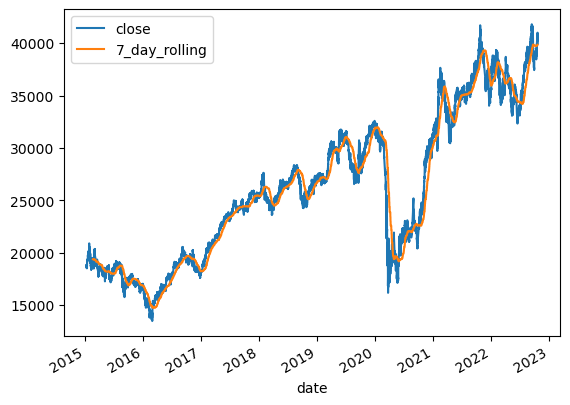

In [24]:
# Series.rolling() - create a rolling window calculation, to smooth time-series data and identify trends over time

# Create a new column for 7- Day rolling average of the closing price

df2['7_day_rolling']= df2['close'].rolling(window = 2016).mean()
# Plot both the rolling average and closing values
df2[['close', '7_day_rolling']].plot()
plt.show()

In [25]:
# Series.idxmax() - To identify the index of the maximum value in a Series.

# Find out the business day with highest closing average

df.resample('B').mean()['close'].idxmax()

Timestamp('2022-09-20 00:00:00+0530', tz='UTC+05:30')

In [26]:
# Series.pct_change() - calculate the percentage change from the previous row

# Create a new column for closing every 5 min return (percentage change in the price from current to next)

df2['5_min_returns'] = df2['close'].pct_change() * 100

In [27]:
df2.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00       0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15       0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00       0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45       0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75       0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...       fastdsr     ULTOSC  \
date                                     ...                            
2015-01-12 09:15:00+05:30  18600.314495  ...  8.427208e+00  45.918057   
2015-01-12 09:20:00+05:30  18582.209664  ...  1.184238e-14  42.061691   
2015-01-12 09:25:00+05:30  18574.956442  ...  6.399205e+00  42.443628   
2015-01-12 09:30:00+05:30  18573.220962  ...  2.563916e+01  43.929576   
2015-01-12 09:35:00+05:30  18570.163974  ...  5.199019e+01  42.057687   

                               WILLR        ATR  Trange      TYPPRICE  \
date                                                                    
2015-01-12 09:15:00+05:30 -68.446741  41.926807  101.90  18573.750000   
2015-01-12 09:20:00+05:30 -75.997703  41.732035   39.20  18559.066667   
2015-01-12 09:25:00+05:30 -74.337957  41.176175   33.95  18553.066667   
2015-01-12 09:30:00+05:30 -73.254637  41.035020   39.20  18558.850000   
2015-01-12 09:35:00+05:30 -77.099494  39.007518   12.65  18568.033333   

                           HT_DCPERIOD      BETA  7_day_rolling  5_min_returns  
date                                                                            
2015-01-12 09:15:00+05:30    21.334048  0.982710            NaN            NaN  
2015-01-12 09:20:00+05:30    21.753220 -1.153971            NaN      -0.070855  
2015-01-12 09:25:00+05:30    22.013101 -1.229017            NaN       0.077914  
2015-01-12 09:30:00+05:30    22.095481 -0.604320            NaN       0.050107  
2015-01-12 09:35:00+05:30    22.217191 -0.273776            NaN      -0.030695  

[5 rows x 60 columns]

In [28]:
# time with more than 0.1 % change in closing price
df2[abs(df2['5_min_returns']) > 0.1]

close      high       low      open  volume  \
date                                                                        
2015-01-12 09:40:00+05:30  18646.85  18646.85  18558.40  18564.05       0   
2015-01-12 09:50:00+05:30  18709.80  18726.65  18645.55  18649.80       0   
2015-01-12 09:55:00+05:30  18729.95  18737.10  18708.10  18709.80       0   
2015-01-12 10:05:00+05:30  18708.75  18754.60  18708.75  18733.40       0   
2015-01-12 10:10:00+05:30  18748.15  18753.55  18708.75  18708.75       0   
...                             ...       ...       ...       ...     ...   
2022-10-21 14:40:00+05:30  40652.35  40725.10  40644.45  40708.10       0   
2022-10-21 14:55:00+05:30  40683.15  40718.05  40630.65  40630.65       0   
2022-10-21 15:05:00+05:30  40757.50  40758.95  40705.45  40705.45       0   
2022-10-21 15:15:00+05:30  40817.10  40826.65  40739.10  40744.85       0   
2022-10-21 15:20:00+05:30  40873.90  40873.90  40790.20  40816.20       0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:40:00+05:30  18577.42  18598.555  18600.666667  18587.3850   
2015-01-12 09:50:00+05:30  18628.05  18603.705  18612.050000  18601.5850   
2015-01-12 09:55:00+05:30  18660.09  18613.385  18621.263333  18612.0950   
2015-01-12 10:05:00+05:30  18706.34  18641.880  18634.483333  18627.0850   
2015-01-12 10:10:00+05:30  18726.01  18662.095  18640.156667  18635.7250   
...                             ...        ...           ...         ...   
2022-10-21 14:40:00+05:30  40697.60  40733.410  40782.230000  40830.2725   
2022-10-21 14:55:00+05:30  40663.93  40699.190  40734.736667  40779.0725   
2022-10-21 15:05:00+05:30  40684.10  40690.850  40716.973333  40757.6975   
2022-10-21 15:15:00+05:30  40741.21  40703.700  40713.640000  40743.1400   
2022-10-21 15:20:00+05:30  40779.36  40721.645  40725.913333  40745.8925   

                                   ema5  ...     fastdsr     ULTOSC  \
date                                     ...                          
2015-01-12 09:40:00+05:30  18595.725983  ...   78.924315  53.773729   
2015-01-12 09:50:00+05:30  18645.767104  ...  100.000000  66.043318   
2015-01-12 09:55:00+05:30  18673.828069  ...  100.000000  72.184385   
2015-01-12 10:05:00+05:30  18698.706920  ...   81.267427  59.235342   
2015-01-12 10:10:00+05:30  18715.187946  ...   74.872572  63.312726   
...                                 ...  ...         ...        ...   
2022-10-21 14:40:00+05:30  40696.834034  ...   34.095878  47.321077   
2022-10-21 14:55:00+05:30  40669.586010  ...   39.538224  37.961973   
2022-10-21 15:05:00+05:30  40706.760449  ...  100.000000  49.099306   
2022-10-21 15:15:00+05:30  40751.660200  ...   96.792449  56.010406   
2022-10-21 15:20:00+05:30  40792.406800  ...   96.792449  63.236350   

                               WILLR        ATR  Trange      TYPPRICE  \
date                                                                    
2015-01-12 09:40:00+05:30 -21.247892  42.539124   88.45  18617.366667   
2015-01-12 09:50:00+05:30  -8.572882  44.339092   81.10  18694.000000   
2015-01-12 09:55:00+05:30  -3.454106  43.243442   29.00  18725.050000   
2015-01-12 10:05:00+05:30 -20.828717  42.630825   45.85  18724.033333   
2015-01-12 10:10:00+05:30  -3.368048  42.785766   44.80  18736.816667   
...                              ...        ...     ...           ...   
2022-10-21 14:40:00+05:30 -93.936705  68.868924   80.65  40673.966667   
2022-10-21 14:55:00+05:30 -73.540714  68.618395   89.85  40677.283333   
2022-10-21 15:05:00+05:30 -36.856835  67.071983   53.95  40740.633333   
2022-10-21 15:15:00+05:30  -4.425394  66.609771   87.55  40794.283333   
2022-10-21 15:20:00+05:30  -0.000000  67.830502   83.70  40846.000000   

                           HT_DCPERIOD      BETA  7_day_rolling  5_min_returns  
date                                                                            
201

## data visualization 

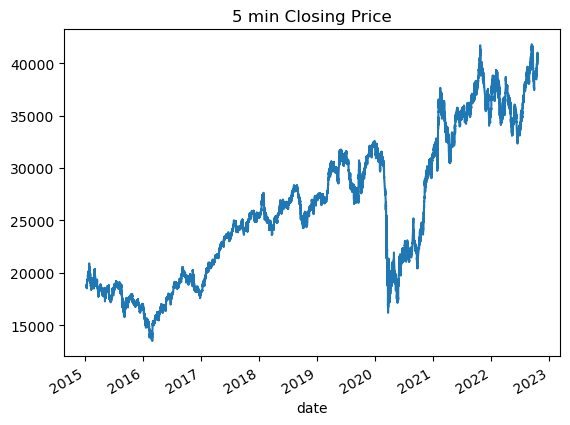

In [30]:
# Closing Price Plot
df['close'].plot(title = '5 min Closing Price')
plt.show()

## data manipulation

In [32]:
#fidning missing values
df.isnull().sum()

close           0
high            0
low             0
open            0
volume          0
sma5            0
sma10           0
sma15           0
sma20           0
ema5            0
ema10           0
ema15           0
ema20           0
upperband       0
middleband      0
lowerband       0
HT_TRENDLINE    0
KAMA10          0
KAMA20          0
KAMA30          0
SAR             0
TRIMA5          0
TRIMA10         0
TRIMA20         0
ADX5            0
ADX10           0
ADX20           0
APO             0
CCI5            0
CCI10           0
CCI15           0
macd510         0
macd520         0
macd1020        0
macd1520        0
macd1226        0
MOM10           0
MOM15           0
MOM20           0
ROC5            0
ROC10           0
ROC20           0
PPO             0
RSI14           0
RSI8            0
slowk           0
slowd           0
fastk           0
fastd           0
fastksr         0
fastdsr         0
ULTOSC          0
WILLR           0
ATR             0
Trange          0
TYPPRICE  

In [33]:
# Extract Time Variables
df2['year'] = df2.index.year
df2['month'] = df2.index.month
df2['day'] = df2.index.day
df2['weekday'] = df2.index.day_name()
df2['weekday_numeric'] = df2.index.weekday

# 5 & 6 is for Saturday and Sunday
df2['is_weekend'] = df2.index.weekday > 4

df2.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00       0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15       0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00       0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45       0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75       0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...  HT_DCPERIOD      BETA  \
date                                     ...                          
2015-01-12 09:15:00+05:30  18600.314495  ...    21.334048  0.982710   
2015-01-12 09:20:00+05:30  18582.209664  ...    21.753220 -1.153971   
2015-01-12 09:25:00+05:30  18574.956442  ...    22.013101 -1.229017   
2015-01-12 09:30:00+05:30  18573.220962  ...    22.095481 -0.604320   
2015-01-12 09:35:00+05:30  18570.163974  ...    22.217191 -0.273776   

                           7_day_rolling  5_min_returns  year  month  day  \
date                                                                        
2015-01-12 09:15:00+05:30            NaN            NaN  2015      1   12   
2015-01-12 09:20:00+05:30            NaN      -0.070855  2015      1   12   
2015-01-12 09:25:00+05:30            NaN       0.077914  2015      1   12   
2015-01-12 09:30:00+05:30            NaN       0.050107  2015      1   12   
2015-01-12 09:35:00+05:30            NaN      -0.030695  2015      1   12   

                           weekday  weekday_numeric  is_weekend  
date                                                             
2015-01-12 09:15:00+05:30   Monday                0       False  
2015-01-12 09:20:00+05:30   Monday                0       False  
2015-01-12 09:25:00+05:30   Monday                0       False  
2015-01-12 09:30:00+05:30   Monday                0       False  
2015-01-12 09:35:00+05:30   Monday                0       False  

[5 rows x 66 columns]

In [34]:
#see how many saturdays are there

# Select rows where the value in 'is_weekend' column is True using .loc
weekend_rows = df2.loc[df2['is_weekend'] == True]

# Display the rows
print(weekend_rows)


                              close      high       low      open  volume  \
date                                                                        
2015-02-28 09:15:00+05:30  19305.00  19306.75  19257.35  19306.50       0   
2015-02-28 09:20:00+05:30  19284.95  19319.15  19280.15  19305.00       0   
2015-02-28 09:25:00+05:30  19292.05  19298.20  19277.75  19288.95       0   
2015-02-28 09:30:00+05:30  19312.40  19317.65  19292.05  19292.05       0   
2015-02-28 09:35:00+05:30  19325.90  19328.55  19307.85  19317.20       0   
...                             ...       ...       ...       ...     ...   
2020-11-14 18:50:00+05:30  28689.20  28703.80  28679.95  28698.40       0   
2020-11-14 18:55:00+05:30  28639.05  28688.05  28625.05  28685.00       0   
2020-11-14 19:00:00+05:30  28557.70  28639.60  28557.70  28639.60       0   
2020-11-14 19:05:00+05:30  28544.05  28567.15  28433.80  28559.20       0   
2020-11-14 19:10:00+05:30  28502.60  28549.80  28502.10  28547.00       0   

In [35]:
# see how amny sundays are there 

weekend_rows2 = df2.loc[df2['weekday_numeric'] == 6]

# Display the rows
print(weekend_rows2)

                              close      high       low      open  volume  \
date                                                                        
2016-10-30 18:30:00+05:30  19574.60  19666.80  19567.90  19657.80       0   
2016-10-30 18:35:00+05:30  19595.80  19604.45  19567.50  19574.40       0   
2016-10-30 18:40:00+05:30  19582.00  19595.25  19574.35  19595.25       0   
2016-10-30 18:45:00+05:30  19573.25  19582.25  19567.50  19579.80       0   
2016-10-30 18:50:00+05:30  19572.75  19579.80  19567.35  19571.80       0   
2016-10-30 18:55:00+05:30  19565.95  19576.75  19561.55  19571.45       0   
2016-10-30 19:00:00+05:30  19553.80  19566.00  19552.55  19565.70       0   
2016-10-30 19:05:00+05:30  19551.45  19555.85  19540.70  19552.75       0   
2016-10-30 19:10:00+05:30  19551.20  19555.85  19544.55  19551.50       0   
2016-10-30 19:15:00+05:30  19507.05  19550.70  19487.20  19550.70       0   
2016-10-30 19:20:00+05:30  19514.80  19518.10  19498.75  19508.45       0   

In [36]:
# we will remove these values so that there will be ony datas for business days 

In [37]:
df2 = df2.loc[df2['is_weekend'] != True]

In [38]:
df2.shape

(135941, 66)

In [39]:
# removing same datapoints from our oiginal dataset

# Get the index of these rows
weekend_index = weekend_rows.index

# Remove the same datapoints from a different dataset (df1)
df = df.drop(index=weekend_index)
df.shape


(135941, 58)

In [40]:
## Feature Engineering - Lagged values

# Series.shift(1) - each value is moved to the row below its current position
# Purpose on stock price prediction: Using yesterday's price to help predict today's

# Create 2 new columns for lagged values 1 and 2
#df['closed_lag1'] = df['Close'].shift(1)
#df['closed_lag2'] = df['Close'].shift(2)

## seasonality

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/1506804640.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_plot(df['close'].resample('M').mean(),


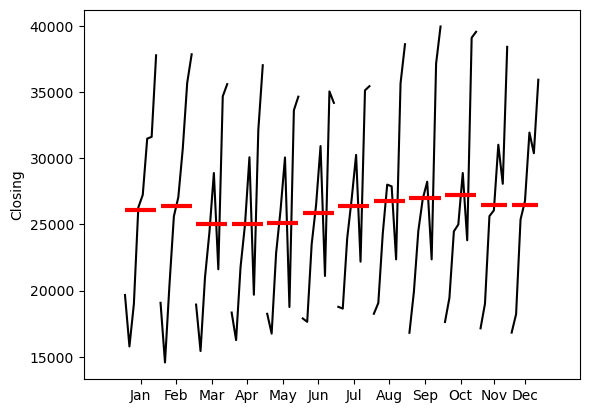

In [42]:
# Plotting the monthly seasonality of closing values
month_plot(df['close'].resample('M').mean(),
           ylabel = 'Closing')
plt.show()

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/2379487607.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarter_plot(df['close'].resample('Q').mean(),


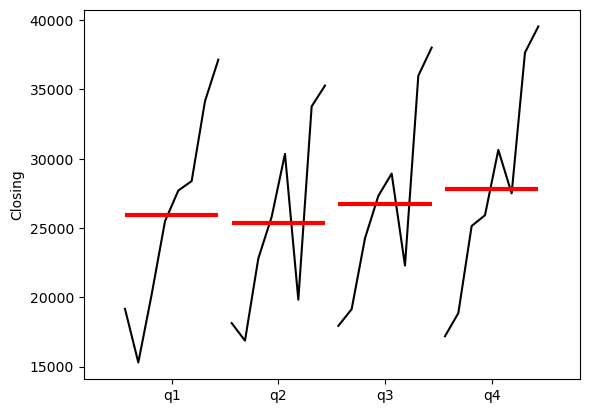

In [43]:
# Plotting the monthly seasonality of closing values
quarter_plot(df['close'].resample('Q').mean(),
           ylabel = 'Closing')
plt.show()

In [44]:
df.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00       0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15       0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00       0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45       0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75       0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...      fastd    fastksr  \
date                                     ...                         
2015-01-12 09:15:00+05:30  18600.314495  ...  27.757822   0.000000   
2015-01-12 09:20:00+05:30  18582.209664  ...  15.808949   0.000000   
2015-01-12 09:25:00+05:30  18574.956442  ...  18.743153  19.197614   
2015-01-12 09:30:00+05:30  18573.220962  ...  25.036883  57.719858   
2015-01-12 09:35:00+05:30  18570.163974  ...  32.156081  79.053088   

                                fastdsr     ULTOSC      WILLR        ATR  \
date                                                                       
2015-01-12 09:15:00+05:30  8.427208e+00  45.918057 -68.446741  41.926807   
2015-01-12 09:20:00+05:30  1.184238e-14  42.061691 -75.997703  41.732035   
2015-01-12 09:25:00+05:30  6.399205e+00  42.443628 -74.337957  41.176175   
2015-01-12 09:30:00+05:30  2.563916e+01  43.929576 -73.254637  41.035020   
2015-01-12 09:35:00+05:30  5.199019e+01  42.057687 -77.099494  39.007518   

                           Trange      TYPPRICE  HT_DCPERIOD      BETA  
date                                                                    
2015-01-12 09:15:00+05:30  101.90  18573.750000    21.334048  0.982710  
2015-01-12 09:20:00+05:30   39.20  18559.066667    21.753220 -1.153971  
2015-01-12 09:25:00+05:30   33.95  18553.066667    22.013101 -1.229017  
2015-01-12 09:30:00+05:30   39.20  18558.850000    22.095481 -0.604320  
2015-01-12 09:35:00+05:30   12.65  18568.033333    22.217191 -0.273776  

[5 rows x 58 columns]

In [45]:

# Resample the data to 5-minute intervals and fill missing values with NaN
df_resampled = df.resample('5T').mean()


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/2195514172.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df_resampled = df.resample('5T').mean()


In [46]:
# # Create a column for day of the week
# df_resampled['day_of_week'] = df_resampled.index.dayofweek

# # Calculate the average for each 5-minute interval across all days
# daily_mean_5min = df_resampled.groupby(df_resampled.index.time).mean()['close']

# # Create the plot
# plt.figure(figsize=(14, 7))

# # Plot each day's values
# for day in range(5):  # Monday=0, ..., Friday=4
#     daily_values = df_resampled[df_resampled['day_of_week'] == day]['close']
#     plt.plot(daily_values.index.time, daily_values.values, color='black', linewidth=1, alpha=0.5)

# # Plot the 5-minute interval means
# plt.plot(daily_mean_5min.index, daily_mean_5min.values, color='red', linewidth=3)

# # Customize the plot
# plt.xlabel('Time of Day')
# plt.ylabel('Closing')
# plt.title('Daily Seasonality of Closing Values (5-Minute Intervals)')
# plt.legend(['Values', '5-Minute Mean'], loc='best')
# plt.grid(True)
# plt.xticks(rotation=45)
# plt.tight_layout()

# plt.show()


## seasonal decompose 

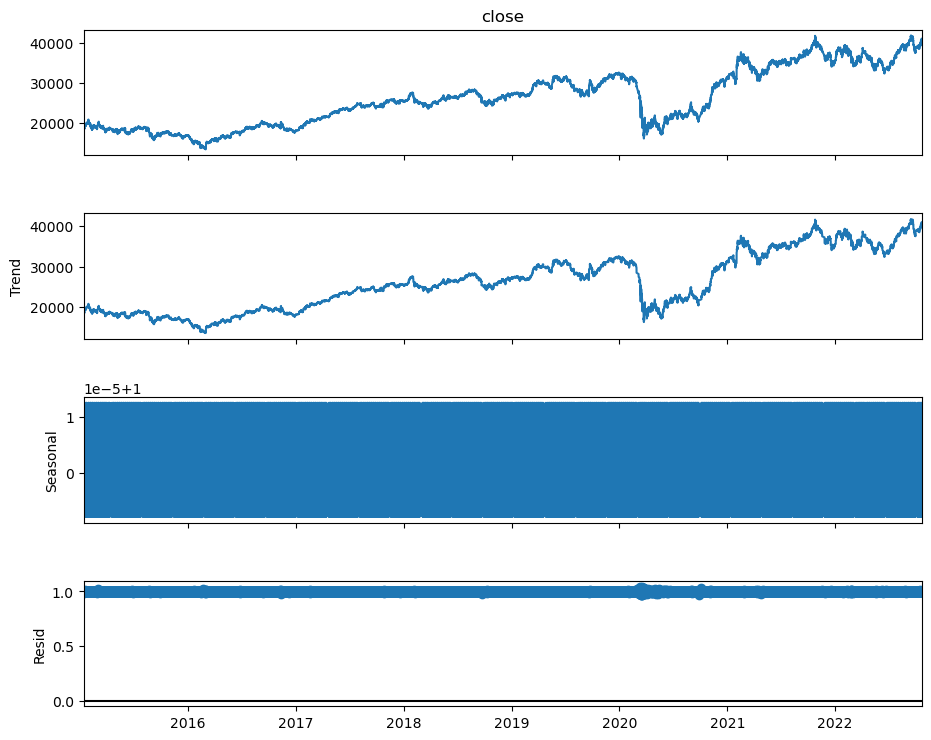

In [48]:
# Seasonal Decomposition Plots for Bitcoin Data
# Multiplicative model type, and daily (365) period
decomposition = seasonal_decompose(df['close'],
                                   model = 'mul',
                                  period= 5)
                                  
fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

In [49]:
# after watching seasonal decompose for weekly , monthly , daily , yearly , we see that there is no seasonality present in the data . 

## auto correlation

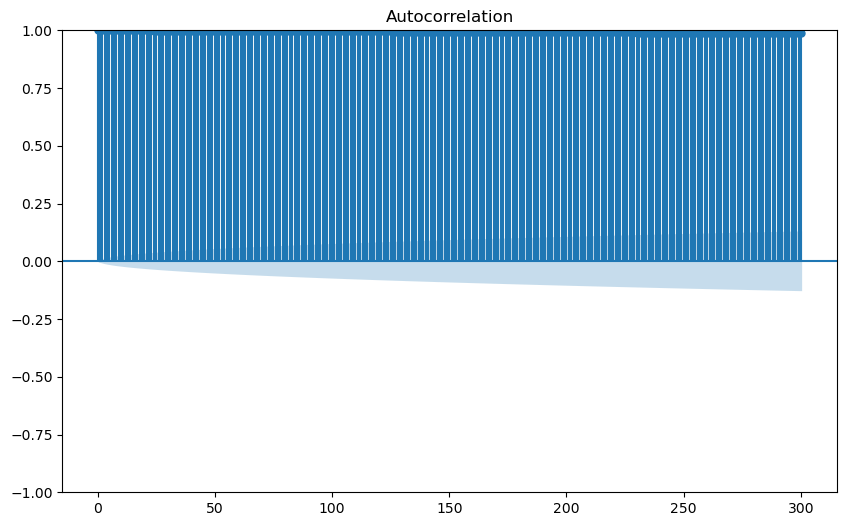

In [51]:
# Plot the autocorrelation (ACF) 
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(df['close'], lags = 300, ax = ax)
plt.show()

In [1]:
# Plot the partial autocorrelation (PACF)
fig, ax = plt.subplots(figsize = (10,6))
plot_pacf(df['close'], lags = 30, ax = ax)
plt.show()

NameError: name 'plt' is not defined

# ARIMA

## setting frequency

In [55]:
df.shape

(135941, 58)

In [56]:
df3= df.asfreq('5min')

In [57]:
df3.shape

(817707, 58)

In [58]:
df3.isnull().sum()

close           681766
high            681766
low             681766
open            681766
volume          681766
sma5            681766
sma10           681766
sma15           681766
sma20           681766
ema5            681766
ema10           681766
ema15           681766
ema20           681766
upperband       681766
middleband      681766
lowerband       681766
HT_TRENDLINE    681766
KAMA10          681766
KAMA20          681766
KAMA30          681766
SAR             681766
TRIMA5          681766
TRIMA10         681766
TRIMA20         681766
ADX5            681766
ADX10           681766
ADX20           681766
APO             681766
CCI5            681766
CCI10           681766
CCI15           681766
macd510         681766
macd520         681766
macd1020        681766
macd1520        681766
macd1226        681766
MOM10           681766
MOM15           681766
MOM20           681766
ROC5            681766
ROC10           681766
ROC20           681766
PPO             681766
RSI14      

In [59]:
df3.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...      fastd    fastksr  \
date                                     ...                         
2015-01-12 09:15:00+05:30  18600.314495  ...  27.757822   0.000000   
2015-01-12 09:20:00+05:30  18582.209664  ...  15.808949   0.000000   
2015-01-12 09:25:00+05:30  18574.956442  ...  18.743153  19.197614   
2015-01-12 09:30:00+05:30  18573.220962  ...  25.036883  57.719858   
2015-01-12 09:35:00+05:30  18570.163974  ...  32.156081  79.053088   

                                fastdsr     ULTOSC      WILLR        ATR  \
date                                                                       
2015-01-12 09:15:00+05:30  8.427208e+00  45.918057 -68.446741  41.926807   
2015-01-12 09:20:00+05:30  1.184238e-14  42.061691 -75.997703  41.732035   
2015-01-12 09:25:00+05:30  6.399205e+00  42.443628 -74.337957  41.176175   
2015-01-12 09:30:00+05:30  2.563916e+01  43.929576 -73.254637  41.035020   
2015-01-12 09:35:00+05:30  5.199019e+01  42.057687 -77.099494  39.007518   

                           Trange      TYPPRICE  HT_DCPERIOD      BETA  
date                                                                    
2015-01-12 09:15:00+05:30  101.90  18573.750000    21.334048  0.982710  
2015-01-12 09:20:00+05:30   39.20  18559.066667    21.753220 -1.153971  
2015-01-12 09:25:00+05:30   33.95  18553.066667    22.013101 -1.229017  
2015-01-12 09:30:00+05:30   39.20  18558.850000    22.095481 -0.604320  
2015-01-12 09:35:00+05:30   12.65  18568.033333    22.217191 -0.273776  

[5 rows x 58 columns]

In [60]:
# Define the time interval
start_time = pd.to_datetime('09:15:00').time()
end_time = pd.to_datetime('15:25:00').time()

# Filter the DataFrame based on the time interval
filtered_df = df3[(df3.index.time >= start_time) & (df3.index.time <= end_time)]

# Display the filtered DataFrame
filtered_df.head(77)


close      high       low      open  volume  \
date                                                                        
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.10  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.00  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.40  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.80  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.70  18569.75     0.0   
...                             ...       ...       ...       ...     ...   
2015-01-12 15:15:00+05:30  18795.30  18801.90  18778.50  18782.20     0.0   
2015-01-12 15:20:00+05:30  18807.00  18808.60  18790.45  18795.30     0.0   
2015-01-12 15:25:00+05:30  18808.75  18822.05  18803.50  18807.00     0.0   
2015-01-13 09:15:00+05:30  18868.80  18890.20  18854.85  18889.00     0.0   
2015-01-13 09:20:00+05:30  18851.70  18875.55  18824.20  18868.80     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   
...                             ...        ...           ...         ...   
2015-01-12 15:15:00+05:30  18787.81  18783.325  18779.356667  18763.4800   
2015-01-12 15:20:00+05:30  18795.48  18783.390  18783.016667  18769.0325   
2015-01-12 15:25:00+05:30  18797.09  18785.135  18787.680000  18774.2850   
2015-01-13 09:15:00+05:30  18812.41  18794.380  18795.483333  18782.0050   
2015-01-13 09:20:00+05:30  18826.31  18803.595  18799.120000  18788.4975   

                                   ema5  ...      fastd     fastksr  \
date                                     ...                          
2015-01-12 09:15:00+05:30  18600.314495  ...  27.757822    0.000000   
2015-01-12 09:20:00+05:30  18582.209664  ...  15.808949    0.000000   
2015-01-12 09:25:00+05:30  18574.956442  ...  18.743153   19.197614   
2015-01-12 09:30:00+05:30  18573.220962  ...  25.036883   57.719858   
2015-01-12 09:35:00+05:30  18570.163974  ...  32.156081   79.053088   
...                                 ...  ...        ...         ...   
2015-01-12 15:15:00+05:30  18787.519506  ...  71.385192   49.089452   
2015-01-12 15:20:00+05:30  18794.013004  ...  77.732965   83.877927   
2015-01-12 15:25:00+05:30  18798.925336  ...  81.431658  100.000000   
2015-01-13 09:15:00+05:30  18822.216891  ...  82.098975  100.000000   
2015-01-13 09:20:00+05:30  18832.044594  ...  71.944869   53.483842   

                                fastdsr     ULTOSC      WILLR        ATR  \
date                                                                       
2015-01-12 09:15:00+05:30  8.427208e+00  45.918057 -68.446741  41.926807   
2015-01-12 09:20:00+05:30  1.184238e-14  42.061691 -75.997703  41.732035   
2015-01-12 09:25:00+05:30  6.399205e+00  42.443628 -74.337957  41.176175   
2015-01-12 09:30:00+05:30  2.563916e+01  43.929576 -73.254637  41.035020   
2015-01-12 09:35:00+05:30  5.199019e+01  42.057687 -77.099494  39.007518   
...                                 ...        ...        ...        ...   
2015-01-12 15:15:00+05:30  4.788992e+01  49.928925 -25.433526  23.394612   
2015-01-12 15:20:00+05:30  5.345288e+01  61.050176 -11.907514  23.019997   
2015-01-12 15:25:00+05:30  7.765579e+01  58.382786 -17.792642  22.700711   
2015-01-13 09:15:00+05:30  9.462598e+01  61.498685 -15.351506  26.897089   
2015-01-13 09:20:00+05:30  8.449461e+01  56.183888 -27.618364  28.643725   

                           Trange      TYPPRICE  HT_DCPERIOD      BETA  
date                                                 

In [61]:
filtered_df.shape

(213000, 58)

In [62]:
filtered_df.isnull().sum()

close           77110
high            77110
low             77110
open            77110
volume          77110
sma5            77110
sma10           77110
sma15           77110
sma20           77110
ema5            77110
ema10           77110
ema15           77110
ema20           77110
upperband       77110
middleband      77110
lowerband       77110
HT_TRENDLINE    77110
KAMA10          77110
KAMA20          77110
KAMA30          77110
SAR             77110
TRIMA5          77110
TRIMA10         77110
TRIMA20         77110
ADX5            77110
ADX10           77110
ADX20           77110
APO             77110
CCI5            77110
CCI10           77110
CCI15           77110
macd510         77110
macd520         77110
macd1020        77110
macd1520        77110
macd1226        77110
MOM10           77110
MOM15           77110
MOM20           77110
ROC5            77110
ROC10           77110
ROC20           77110
PPO             77110
RSI14           77110
RSI8            77110
slowk     

In [63]:
df_arima= filtered_df.interpolate()


In [64]:
df_arima.isnull().sum()

close           0
high            0
low             0
open            0
volume          0
sma5            0
sma10           0
sma15           0
sma20           0
ema5            0
ema10           0
ema15           0
ema20           0
upperband       0
middleband      0
lowerband       0
HT_TRENDLINE    0
KAMA10          0
KAMA20          0
KAMA30          0
SAR             0
TRIMA5          0
TRIMA10         0
TRIMA20         0
ADX5            0
ADX10           0
ADX20           0
APO             0
CCI5            0
CCI10           0
CCI15           0
macd510         0
macd520         0
macd1020        0
macd1520        0
macd1226        0
MOM10           0
MOM15           0
MOM20           0
ROC5            0
ROC10           0
ROC20           0
PPO             0
RSI14           0
RSI8            0
slowk           0
slowd           0
fastk           0
fastd           0
fastksr         0
fastdsr         0
ULTOSC          0
WILLR           0
ATR             0
Trange          0
TYPPRICE  

## stationarity

In [66]:
# Perform Augmented Dickey-Fuller test
# 'result' contains the test statistic and the p-value.
result = adfuller(df_arima['close'])
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

p-value: 0.895654
Evidence suggests that the time series is not stationary.


In [67]:
# Compute the first difference of the 'y' column in DataFrame 'df' and assign it to a new column 'y_diff'.
# '.diff()' calculates the difference between consecutive elements along the specified axis (by default axis 0).
# 'dropna()' removes any rows with NaN values resulting from differencing.
df_arima['y_diff'] = df_arima['close'].diff().dropna()


In [68]:
df_arima.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...    fastksr       fastdsr  \
date                                     ...                            
2015-01-12 09:15:00+05:30  18600.314495  ...   0.000000  8.427208e+00   
2015-01-12 09:20:00+05:30  18582.209664  ...   0.000000  1.184238e-14   
2015-01-12 09:25:00+05:30  18574.956442  ...  19.197614  6.399205e+00   
2015-01-12 09:30:00+05:30  18573.220962  ...  57.719858  2.563916e+01   
2015-01-12 09:35:00+05:30  18570.163974  ...  79.053088  5.199019e+01   

                              ULTOSC      WILLR        ATR  Trange  \
date                                                                 
2015-01-12 09:15:00+05:30  45.918057 -68.446741  41.926807  101.90   
2015-01-12 09:20:00+05:30  42.061691 -75.997703  41.732035   39.20   
2015-01-12 09:25:00+05:30  42.443628 -74.337957  41.176175   33.95   
2015-01-12 09:30:00+05:30  43.929576 -73.254637  41.035020   39.20   
2015-01-12 09:35:00+05:30  42.057687 -77.099494  39.007518   12.65   

                               TYPPRICE  HT_DCPERIOD      BETA  y_diff  
date                                                                    
2015-01-12 09:15:00+05:30  18573.750000    21.334048  0.982710     NaN  
2015-01-12 09:20:00+05:30  18559.066667    21.753220 -1.153971  -13.15  
2015-01-12 09:25:00+05:30  18553.066667    22.013101 -1.229017   14.45  
2015-01-12 09:30:00+05:30  18558.850000    22.095481 -0.604320    9.30  
2015-01-12 09:35:00+05:30  18568.033333    22.217191 -0.273776   -5.70  

[5 rows x 59 columns]

In [69]:
df_arima.shape

(213000, 59)

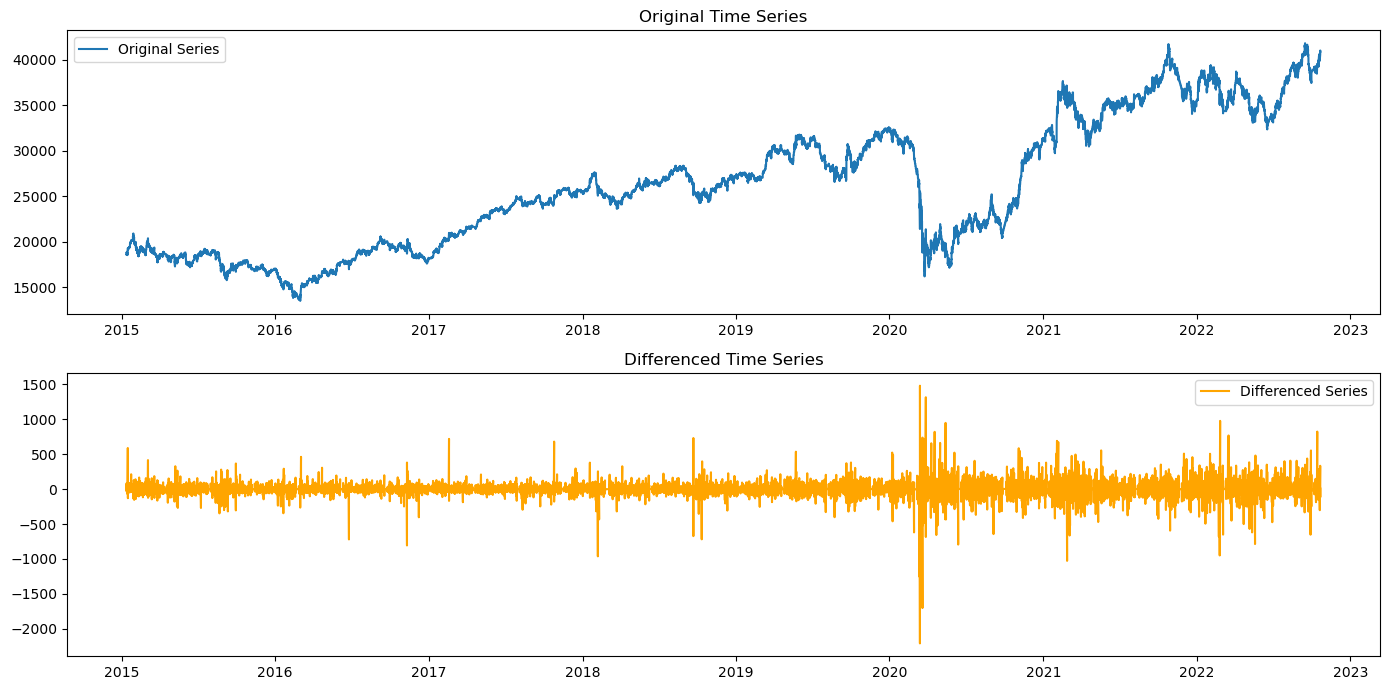

In [70]:
# Plotting the original and differenced series
# Set the size of the plot to 14 inches by 7 inches
plt.figure(figsize=(14, 7))

# Subplot for the original series
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st subplot
plt.plot(df_arima['close'], label='Original Series')
plt.title('Original Time Series')
plt.legend()

# Subplot for the differenced series
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 2nd subplot
plt.plot(df_arima['y_diff'], label='Differenced Series', color='orange')
plt.title('Differenced Time Series')
plt.legend()

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()
plt.show()

In [71]:
df_arima= df_arima.fillna(method='bfill')

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/387482578.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_arima= df_arima.fillna(method='bfill')


In [72]:
df_arima.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...    fastksr       fastdsr  \
date                                     ...                            
2015-01-12 09:15:00+05:30  18600.314495  ...   0.000000  8.427208e+00   
2015-01-12 09:20:00+05:30  18582.209664  ...   0.000000  1.184238e-14   
2015-01-12 09:25:00+05:30  18574.956442  ...  19.197614  6.399205e+00   
2015-01-12 09:30:00+05:30  18573.220962  ...  57.719858  2.563916e+01   
2015-01-12 09:35:00+05:30  18570.163974  ...  79.053088  5.199019e+01   

                              ULTOSC      WILLR        ATR  Trange  \
date                                                                 
2015-01-12 09:15:00+05:30  45.918057 -68.446741  41.926807  101.90   
2015-01-12 09:20:00+05:30  42.061691 -75.997703  41.732035   39.20   
2015-01-12 09:25:00+05:30  42.443628 -74.337957  41.176175   33.95   
2015-01-12 09:30:00+05:30  43.929576 -73.254637  41.035020   39.20   
2015-01-12 09:35:00+05:30  42.057687 -77.099494  39.007518   12.65   

                               TYPPRICE  HT_DCPERIOD      BETA  y_diff  
date                                                                    
2015-01-12 09:15:00+05:30  18573.750000    21.334048  0.982710  -13.15  
2015-01-12 09:20:00+05:30  18559.066667    21.753220 -1.153971  -13.15  
2015-01-12 09:25:00+05:30  18553.066667    22.013101 -1.229017   14.45  
2015-01-12 09:30:00+05:30  18558.850000    22.095481 -0.604320    9.30  
2015-01-12 09:35:00+05:30  18568.033333    22.217191 -0.273776   -5.70  

[5 rows x 59 columns]

In [73]:
# Perform Augmented Dickey-Fuller test
# 'result' contains the test statistic and the p-value.
result = adfuller(df_arima['y_diff'])
print('p-value: %f' % result[1])

# Interpreting the results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

p-value: 0.000000
Evidence suggests that the time series is stationary.


## splitting data into train test

In [75]:
# Calculate the split index (80% of the data)
split_index = int(len(df_arima) * 0.8)

# Split the data into train and test sets
train_data = df_arima.iloc[:split_index]
test_data = df_arima.iloc[split_index:]

In [76]:
train_data.shape

(170400, 59)

In [77]:
test_data.shape

(42600, 59)

In [78]:
train_data.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...    fastksr       fastdsr  \
date                                     ...                            
2015-01-12 09:15:00+05:30  18600.314495  ...   0.000000  8.427208e+00   
2015-01-12 09:20:00+05:30  18582.209664  ...   0.000000  1.184238e-14   
2015-01-12 09:25:00+05:30  18574.956442  ...  19.197614  6.399205e+00   
2015-01-12 09:30:00+05:30  18573.220962  ...  57.719858  2.563916e+01   
2015-01-12 09:35:00+05:30  18570.163974  ...  79.053088  5.199019e+01   

                              ULTOSC      WILLR        ATR  Trange  \
date                                                                 
2015-01-12 09:15:00+05:30  45.918057 -68.446741  41.926807  101.90   
2015-01-12 09:20:00+05:30  42.061691 -75.997703  41.732035   39.20   
2015-01-12 09:25:00+05:30  42.443628 -74.337957  41.176175   33.95   
2015-01-12 09:30:00+05:30  43.929576 -73.254637  41.035020   39.20   
2015-01-12 09:35:00+05:30  42.057687 -77.099494  39.007518   12.65   

                               TYPPRICE  HT_DCPERIOD      BETA  y_diff  
date                                                                    
2015-01-12 09:15:00+05:30  18573.750000    21.334048  0.982710  -13.15  
2015-01-12 09:20:00+05:30  18559.066667    21.753220 -1.153971  -13.15  
2015-01-12 09:25:00+05:30  18553.066667    22.013101 -1.229017   14.45  
2015-01-12 09:30:00+05:30  18558.850000    22.095481 -0.604320    9.30  
2015-01-12 09:35:00+05:30  18568.033333    22.217191 -0.273776   -5.70  

[5 rows x 59 columns]

## ARIMA using pmdarima 

In [80]:
# auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
#'seasonal=False' indicates that the model should not consider seasonal components.
model1 =  auto_arima(train_data['close'], 
                     start_p=1, 
                     d=1, 
                     start_q=0, 
                     max_p=5, 
                     max_q=5,
                     
                     seasonal=False, 
                     error_action='warn', 
                     trace=True, 
                     suppress_warnings=True,
                     stepwise=True, 
                     random_state=20, 
                     n_fits=5 # no of fits is taken as 5 we can increatese this hyperoparam to obtain better result
                    ) 


Performing stepwise search to minimize aic
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1638809.062, Time=2.14 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1638813.248, Time=1.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1638808.988, Time=4.27 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1638812.819, Time=0.75 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1638811.035, Time=5.75 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1638804.806, Time=4.95 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1638804.780, Time=8.13 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1638749.103, Time=78.30 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1638782.848, Time=27.47 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=1638731.450, Time=7.55 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=1638732.996, Time=10.77 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=1638733.261, Time=15.62 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=145.00 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=1638732.166, Time=10

In [81]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:               170400
Model:               SARIMAX(4, 1, 0)   Log Likelihood             -819359.382
Date:                Mon, 16 Dec 2024   AIC                        1638728.765
Time:                        01:27:26   BIC                        1638778.994
Sample:                             0   HQIC                       1638743.652
                             - 170400                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0061      0.000     12.508      0.000       0.005       0.007
ar.L2         -0.0059      0.000    -13.302      0.000      -0.007      -0.005
ar.L3          0.0211      0.001     28.578      0.000       0.020       0.023
ar.L4          0.0046      0.001      4.761      0.000       0.003       0.007
sigma2       879.2715      0.212   4154.995      0.000     878.857     879.686
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):        1268920668.23
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               4.89   Skew:                            -2.58
Prob(H) (two-sided):                  0.00   Kurtosis:                       425.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [82]:
#Use the fitted ARIMA model to forecast future values.
#set the number of periods to forecast to the length of 'test'
predictions_arima = model1.predict(n_periods = len(test_data))
predictions_arima

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


170400    33906.301550
170401    33905.580514
170402    33906.071168
170403    33906.236039
170404    33906.223289
              ...     
212995    33906.235869
212996    33906.235869
212997    33906.235869
212998    33906.235869
212999    33906.235869
Length: 42600, dtype: float64

In [83]:
predictions_arima.describe()

count    42600.000000
mean     33906.235851
std          0.003290
min      33905.580514
25%      33906.235869
50%      33906.235869
75%      33906.235869
max      33906.301550
dtype: float64

In [84]:
# setting the prediction index to test data index 
predictions_arima.index = test_data.index

In [85]:
# Function to assess model and visualize output
def model_assessment(train, test, predictions, chart_title):
  # Set the size of the plot to 10 inches by 4 inches
  plt.figure(figsize = (10,4))
  # Plot the train, test, and forecast data
  plt.plot(train, label = 'Train')
  plt.plot(test, label = 'Test')
  plt.plot(predictions, label = "Forecast")
  # add title and legend to the plot
  plt.title(f"Train, Test and Predictions with {chart_title}")
  plt.legend()
  plt.show()

  # Calculating the MAE, RMSE, and MAPE
  mae = mean_absolute_error(test, predictions)
  rmse = mean_squared_error(test, predictions, squared = False)
  mape = mean_absolute_percentage_error(test, predictions)

  # Print the calculated error metrics
  print(f"The MAE is {mae:.2f}")
  print(f"The RMSE is {rmse:.2f}")
  print(f"The MAPE is {100 * mape:.2f} %")

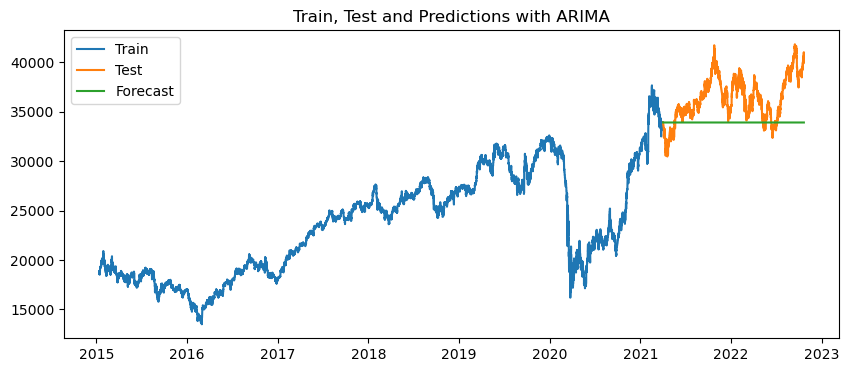

The MAE is 2752.25
The RMSE is 3305.61
The MAPE is 7.33 %


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [86]:
# Model assessment
model_assessment(train_data['close'], test_data['close'], predictions_arima, "ARIMA")

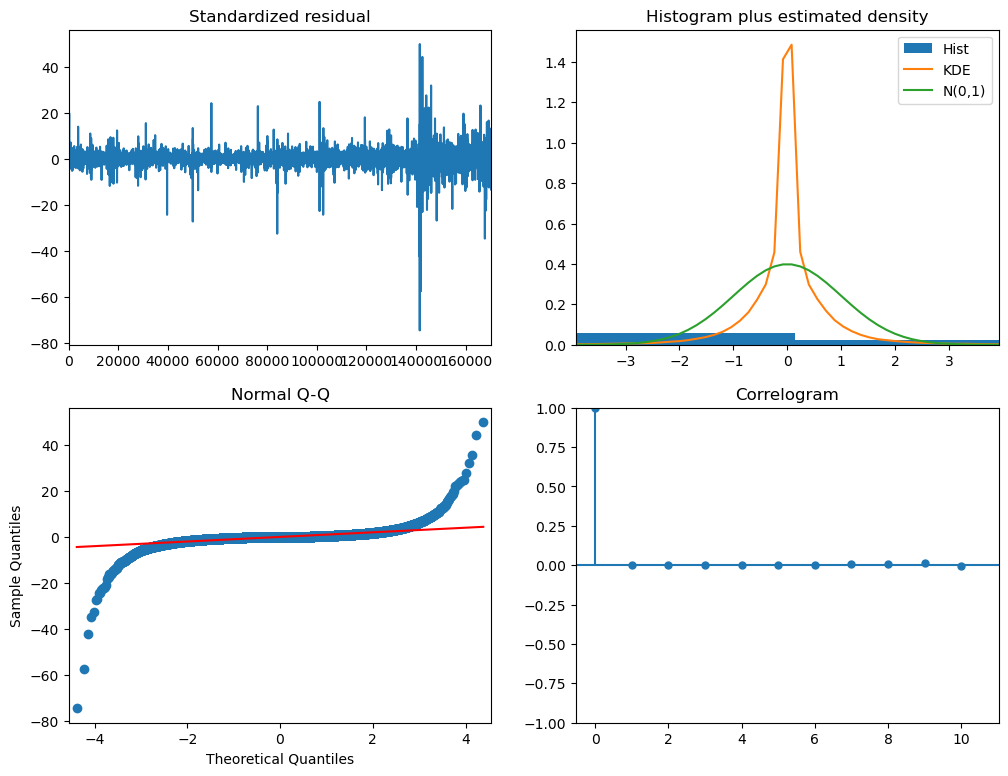

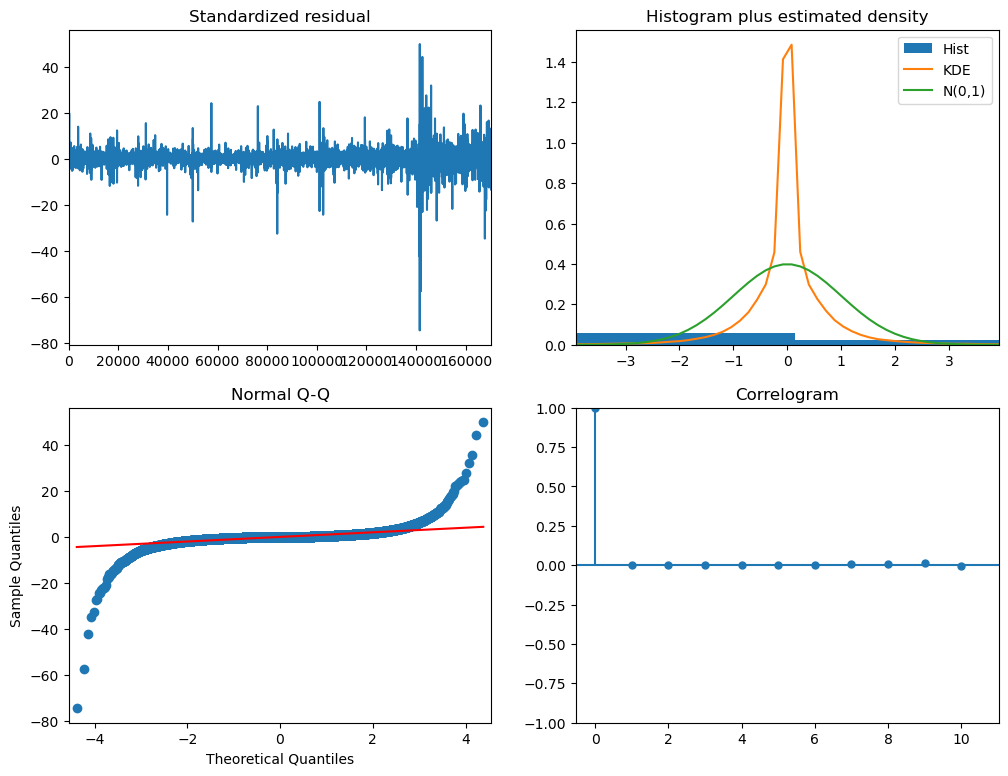

In [87]:
model1.plot_diagnostics(figsize=(12,9))


In [88]:
print(df_arima.index.freq)

None


In [89]:
# from statsmodels.tsa.arima.model import ARIMA

# model2= ARIMA(train_data['close'],order=(4,1,1))
# fitted_model2= model2.fit()

In [90]:
# #Use the fitted ARIMA model to forecast future values.
# #set the number of periods to forecast to the length of 'test'
# predictions_arima2 = fitted_model2.forecast(steps=len(test_data))  # Forecast for the length of the test data
# predictions_arima2

In [91]:
# # setting the prediction index to test data index 
# predictions_arima2.index = test_data.index

## ARIMAX

In [93]:
df4=df_arima.iloc[:,1:-1]
df4.head()

high      low      open  volume      sma5  \
date                                                                       
2015-01-12 09:15:00+05:30  18632.00  18530.1  18632.00     0.0  18619.69   
2015-01-12 09:20:00+05:30  18585.20  18546.0  18559.15     0.0  18596.28   
2015-01-12 09:25:00+05:30  18566.35  18532.4  18546.00     0.0  18579.36   
2015-01-12 09:30:00+05:30  18573.00  18533.8  18560.45     0.0  18566.68   
2015-01-12 09:35:00+05:30  18576.35  18563.7  18569.75     0.0  18559.88   

                               sma10         sma15       sma20          ema5  \
date                                                                           
2015-01-12 09:15:00+05:30  18612.290  18590.706667  18573.4375  18600.314495   
2015-01-12 09:20:00+05:30  18609.355  18591.503333  18574.7825  18582.209664   
2015-01-12 09:25:00+05:30  18604.050  18592.763333  18577.4825  18574.956442   
2015-01-12 09:30:00+05:30  18601.850  18596.096667  18579.9075  18573.220962   
2015-01-12 09:35:00+05:30  18597.695  18596.180000  18582.4025  18570.163974   

                                  ema10  ...      fastd    fastksr  \
date                                     ...                         
2015-01-12 09:15:00+05:30  18601.588271  ...  27.757822   0.000000   
2015-01-12 09:20:00+05:30  18591.481313  ...  15.808949   0.000000   
2015-01-12 09:25:00+05:30  18585.839256  ...  18.743153  19.197614   
2015-01-12 09:30:00+05:30  18582.913937  ...  25.036883  57.719858   
2015-01-12 09:35:00+05:30  18579.484130  ...  32.156081  79.053088   

                                fastdsr     ULTOSC      WILLR        ATR  \
date                                                                       
2015-01-12 09:15:00+05:30  8.427208e+00  45.918057 -68.446741  41.926807   
2015-01-12 09:20:00+05:30  1.184238e-14  42.061691 -75.997703  41.732035   
2015-01-12 09:25:00+05:30  6.399205e+00  42.443628 -74.337957  41.176175   
2015-01-12 09:30:00+05:30  2.563916e+01  43.929576 -73.254637  41.035020   
2015-01-12 09:35:00+05:30  5.199019e+01  42.057687 -77.099494  39.007518   

                           Trange      TYPPRICE  HT_DCPERIOD      BETA  
date                                                                    
2015-01-12 09:15:00+05:30  101.90  18573.750000    21.334048  0.982710  
2015-01-12 09:20:00+05:30   39.20  18559.066667    21.753220 -1.153971  
2015-01-12 09:25:00+05:30   33.95  18553.066667    22.013101 -1.229017  
2015-01-12 09:30:00+05:30   39.20  18558.850000    22.095481 -0.604320  
2015-01-12 09:35:00+05:30   12.65  18568.033333    22.217191 -0.273776  

[5 rows x 57 columns]

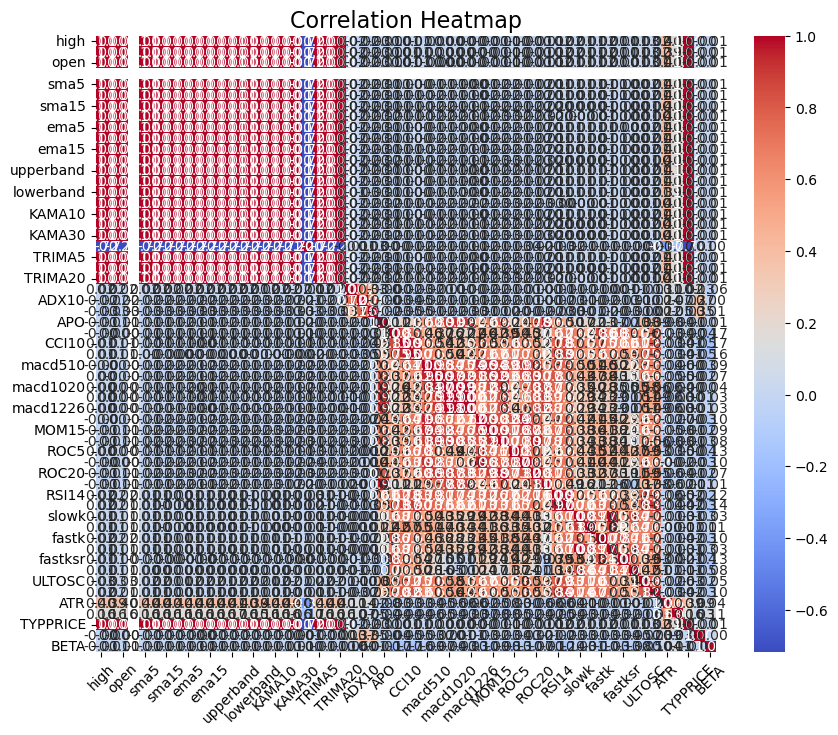

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df4.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Add labels and title
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


In [95]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [96]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = df4.columns
vif_data['VIF'] = [variance_inflation_factor(df4.values, i) for i in range(df4.shape[1])]

# Print the VIF values
print(vif_data)


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:1785: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


        Variable           VIF
0           high  2.875783e+07
1            low  2.666994e+07
2           open  1.738332e+06
3         volume           NaN
4           sma5  5.972924e+08
5          sma10  1.364631e+08
6          sma15  4.030131e+08
7          sma20  2.108839e+08
8           ema5  4.274721e+08
9          ema10  4.376183e+08
10         ema15  1.322643e+13
11         ema20  2.099346e+09
12     upperband  7.713809e+09
13    middleband  2.624101e+09
14     lowerband  4.742268e+08
15  HT_TRENDLINE  1.520401e+06
16        KAMA10  1.725087e+06
17        KAMA20  2.402390e+06
18        KAMA30  1.305849e+06
19           SAR  3.704539e+01
20        TRIMA5  2.844334e+08
21       TRIMA10  1.209344e+08
22       TRIMA20  1.119492e+09
23          ADX5  2.654728e+01
24         ADX10  4.627656e+01
25         ADX20  2.054663e+01
26           APO  4.508385e+02
27          CCI5  1.061593e+01
28         CCI10  2.141322e+01
29         CCI15  1.898637e+01
30       macd510  2.853453e+09
31      

Text(0.5, 1.0, 'Feature Correlation')

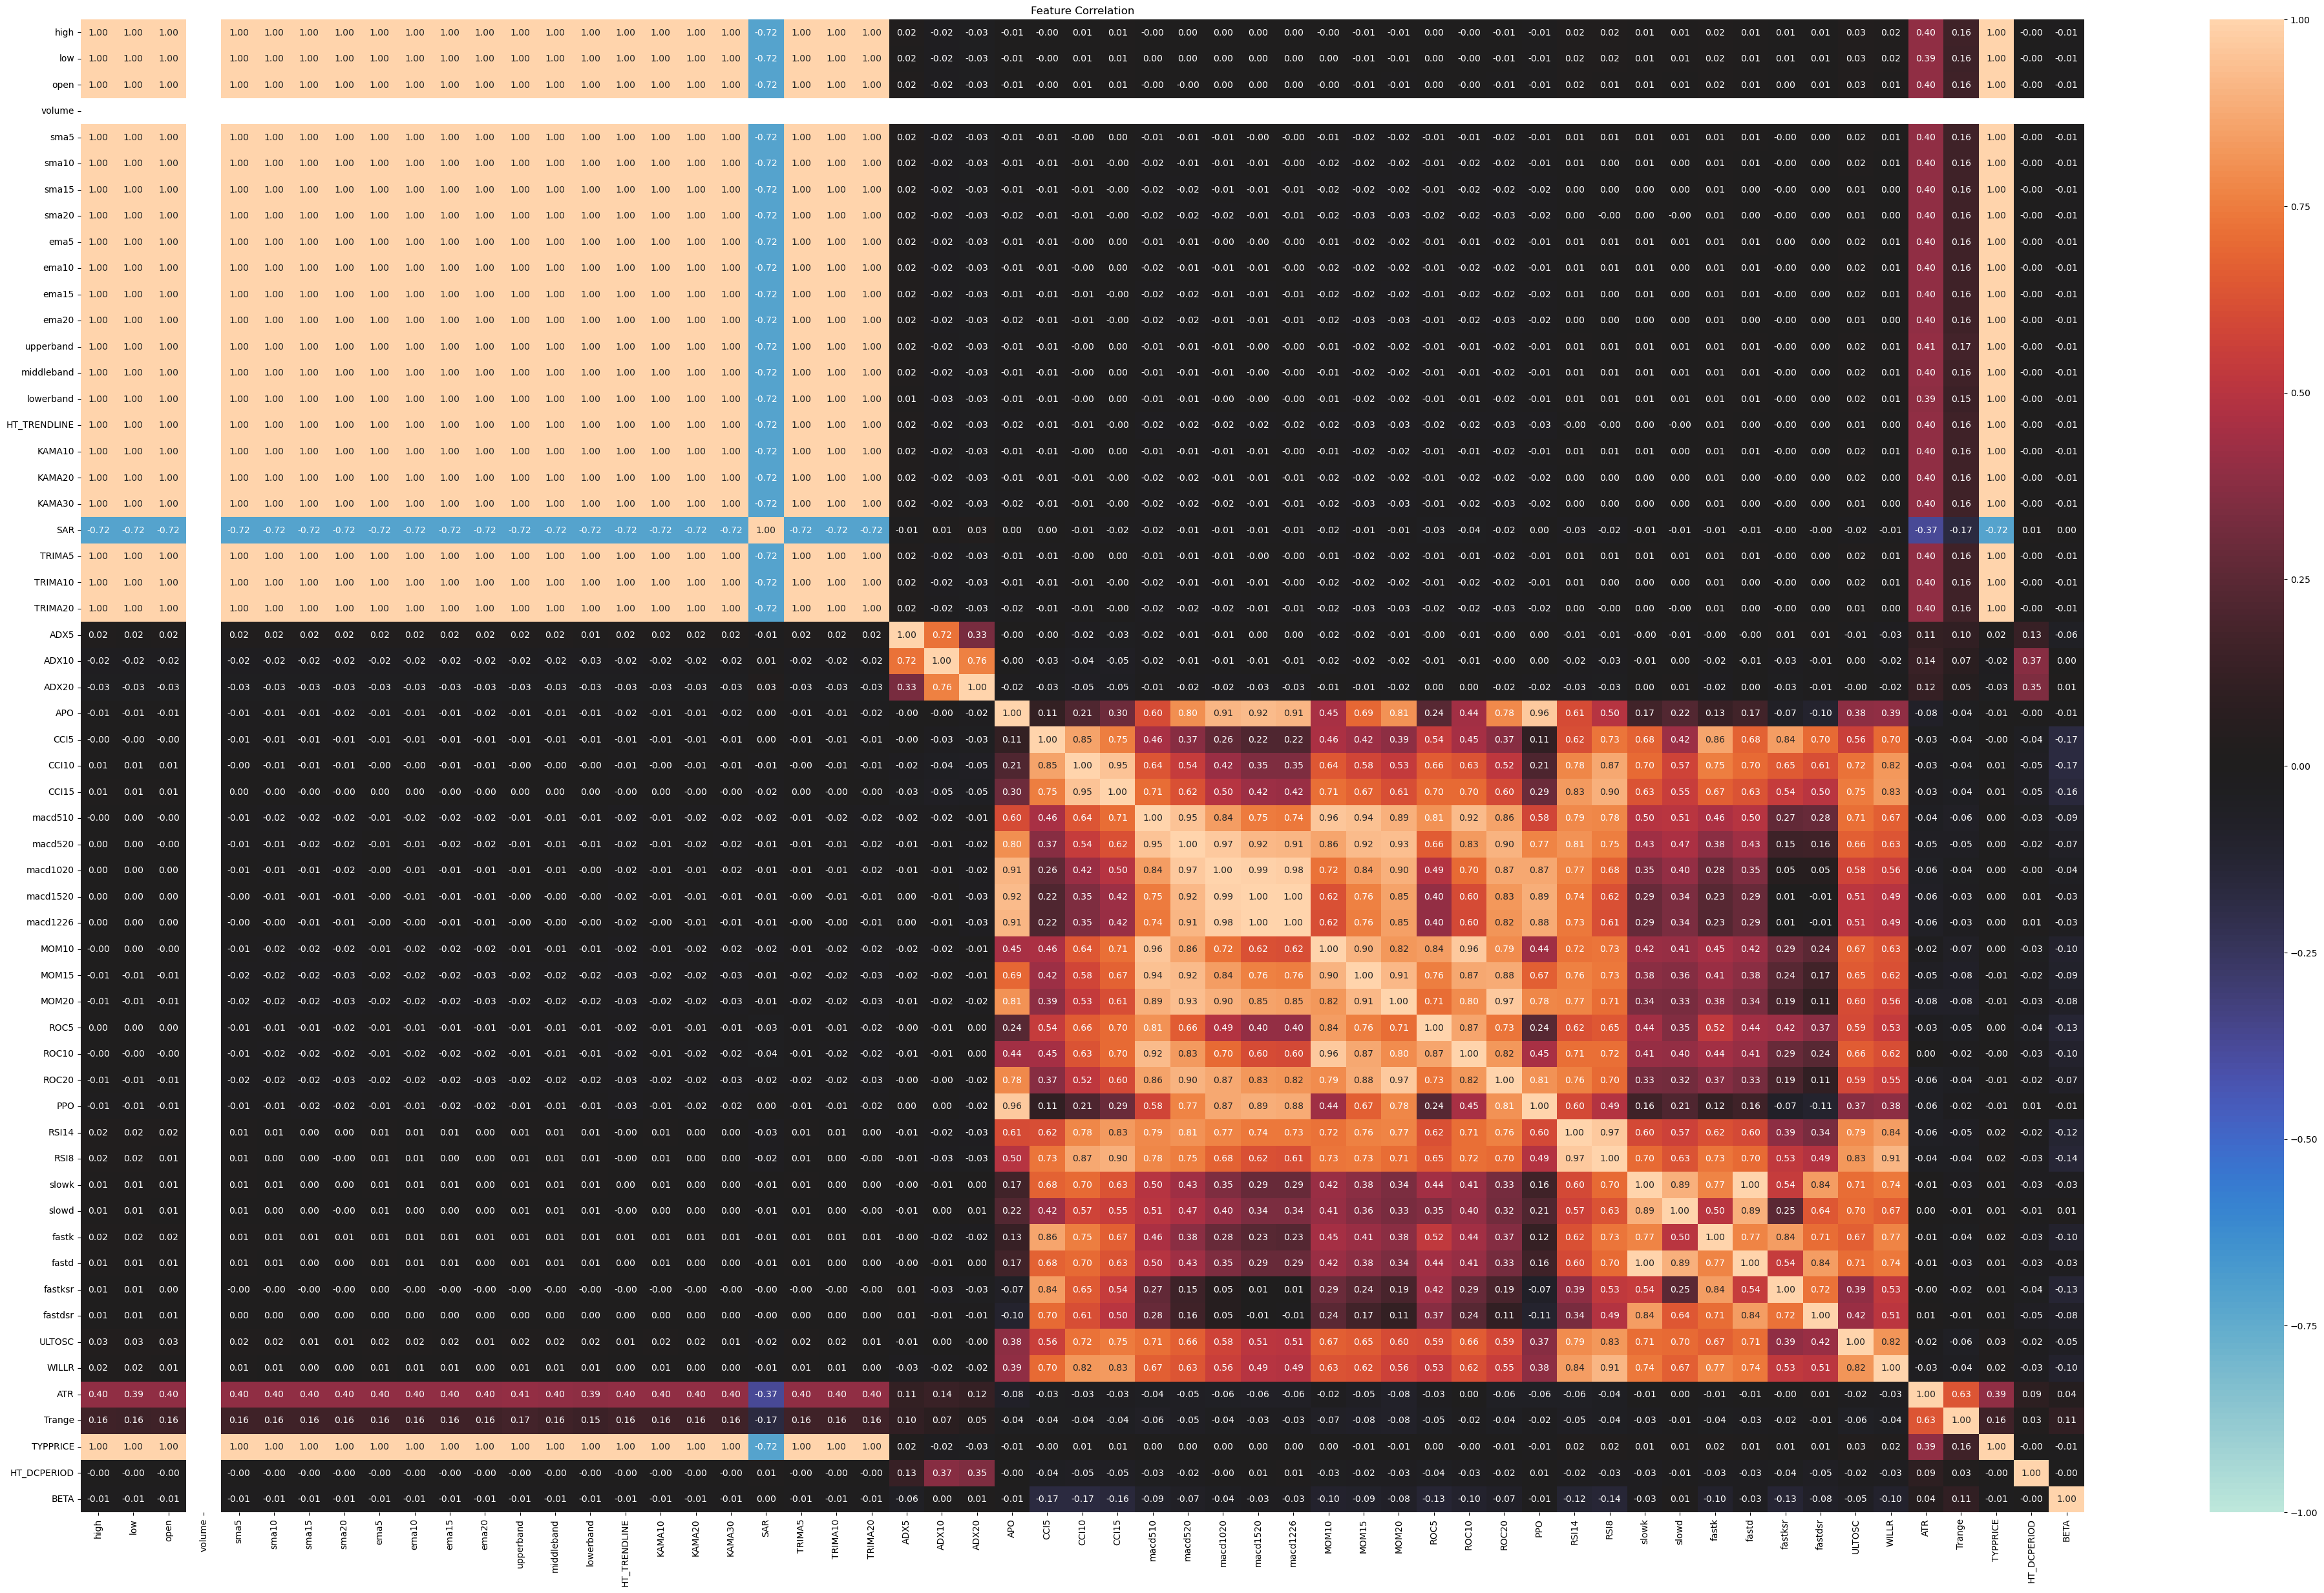

In [97]:
#Checking Correlations (all features)
fig = plt.subplots(figsize=(50, 30))
sns.heatmap(df4.corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Feature Correlation', fontsize=12)

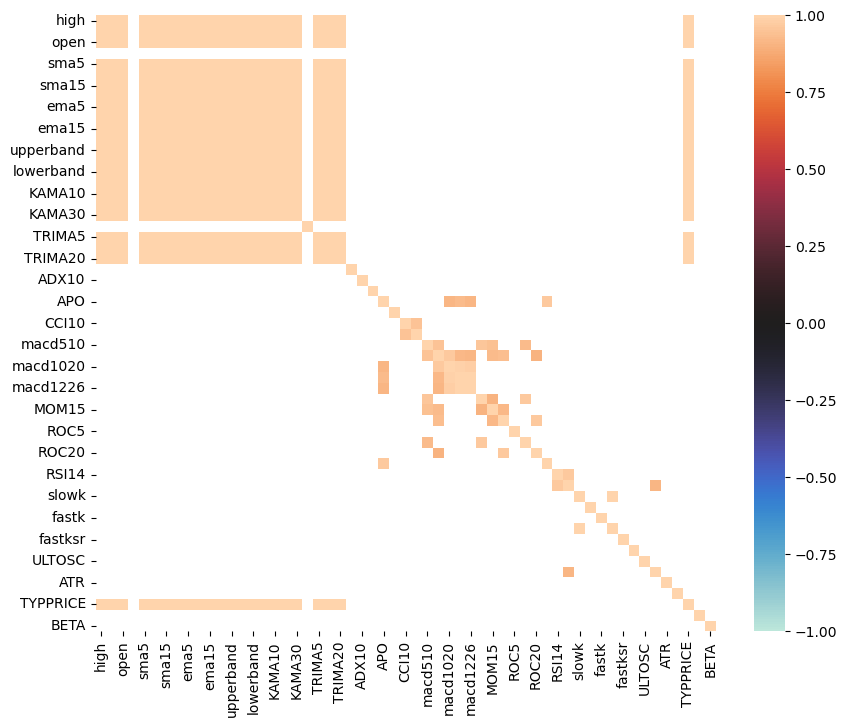

In [98]:
#Checking Correlations for feature which are 90% relavent [dimentionality reduction]
fig = plt.subplots(figsize=(10, 8)) 
corr = df4.corr()
sns.heatmap(corr[corr>0.9], vmax=1, vmin=-1, center=0)
plt.show()

In [99]:
# correlation analysis summary for exogeneous variables 

# - the above corralation heat map derives features that are 90% and above correlated, hence we can eventually merge those features to reduce the dimentions of the data set

# - open, high, sma5, sma15, ema5, ema15,upperband,lowerband,KAMA10,КАМА30,TRIMA5,TRIMA20,TYPPRICE  are almost have same kind of data
# we will chose ema5

# - APO,macd1020,macd1226,,RSI14,slowk,ULTOSC,ATR are similar
# we will chose RSI14 [cause it is better indicator for momentum reading]

# - CCI10, macd510,macd1020,macd1226,MOM15,ROC5,ROC2O
# we will chose RSI14

# - fastk,fastksr are similar
# we will chose fastk [ cause it is better indicator for intraday , for quicker reactions]

#so finally we will select ema5,ADX10,RSI14,fastk


In [100]:
variables_to_remove = [
    'high','low','volume','MFI', 'open', 'sma5', 'sma15', 'ema15',
    'upperband', 'lowerband', 'KAMA10', 'KAMA30', 
    'TRIMA5', 'TRIMA20',  'APO', 'CCI10', 
    'macd510', 'macd1020', 'macd1226', 'MOM15', 
    'ROC5', 'ROC20', 'slowk', 
    'fastksr', 'ULTOSC', 'ATR', 'TYPPRICE', 'BETA'
]


In [101]:
# Remove the variables listed in 'variables_to_remove' from the dataset
df4 = df4.drop(columns=variables_to_remove, errors='ignore')


In [102]:
df4.head()

sma10       sma20          ema5         ema10  \
date                                                                           
2015-01-12 09:15:00+05:30  18612.290  18573.4375  18600.314495  18601.588271   
2015-01-12 09:20:00+05:30  18609.355  18574.7825  18582.209664  18591.481313   
2015-01-12 09:25:00+05:30  18604.050  18577.4825  18574.956442  18585.839256   
2015-01-12 09:30:00+05:30  18601.850  18579.9075  18573.220962  18582.913937   
2015-01-12 09:35:00+05:30  18597.695  18582.4025  18570.163974  18579.484130   

                                  ema20  middleband  HT_TRENDLINE  \
date                                                                
2015-01-12 09:15:00+05:30  18594.432414    18619.69  18578.771034   
2015-01-12 09:20:00+05:30  18589.819803    18596.28  18577.660517   
2015-01-12 09:25:00+05:30  18587.022679    18579.36  18576.730690   
2015-01-12 09:30:00+05:30  18585.377662    18566.68  18575.837414   
2015-01-12 09:35:00+05:30  18583.346456    18559.88  18574.879138   

                                 KAMA20       SAR       TRIMA10  ...  \
date                                                             ...   
2015-01-12 09:15:00+05:30  18585.187746  18859.65  18624.713333  ...   
2015-01-12 09:20:00+05:30  18584.773033  18859.65  18623.278333  ...   
2015-01-12 09:25:00+05:30  18584.288183  18859.65  18616.100000  ...   
2015-01-12 09:30:00+05:30  18584.026033  18859.65  18605.756667  ...   
2015-01-12 09:35:00+05:30  18583.653630  18859.65  18592.900000  ...   

                                PPO      RSI14       RSI8      slowd  \
date                                                                   
2015-01-12 09:15:00+05:30  0.153494  43.473728  38.869985  45.779265   
2015-01-12 09:20:00+05:30  0.157186  41.563067  36.061738  28.937061   
2015-01-12 09:25:00+05:30  0.156177  44.452091  41.380349  20.769975   
2015-01-12 09:30:00+05:30  0.157501  46.292435  44.760192  19.862995   
2015-01-12 09:35:00+05:30  0.139015  45.301778  43.022654  25.312039   

                               fastk      fastd       fastdsr      WILLR  \
date                                                                       
2015-01-12 09:15:00+05:30  19.595278  27.757822  8.427208e+00 -68.446741   
2015-01-12 09:20:00+05:30  11.959383  15.808949  1.184238e-14 -75.997703   
2015-01-12 09:25:00+05:30  24.674797  18.743153  6.399205e+00 -74.337957   
2015-01-12 09:30:00+05:30  38.476468  25.036883  2.563916e+01 -73.254637   
2015-01-12 09:35:00+05:30  33.316977  32.156081  5.199019e+01 -77.099494   

                           Trange  HT_DCPERIOD  
date                                            
2015-01-12 09:15:00+05:30  101.90    21.334048  
2015-01-12 09:20:00+05:30   39.20    21.753220  
2015-01-12 09:25:00+05:30   33.95    22.013101  
2015-01-12 09:30:00+05:30   39.20    22.095481  
2015-01-12 09:35:00+05:30   12.65    22.217191  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Feature Correlation')

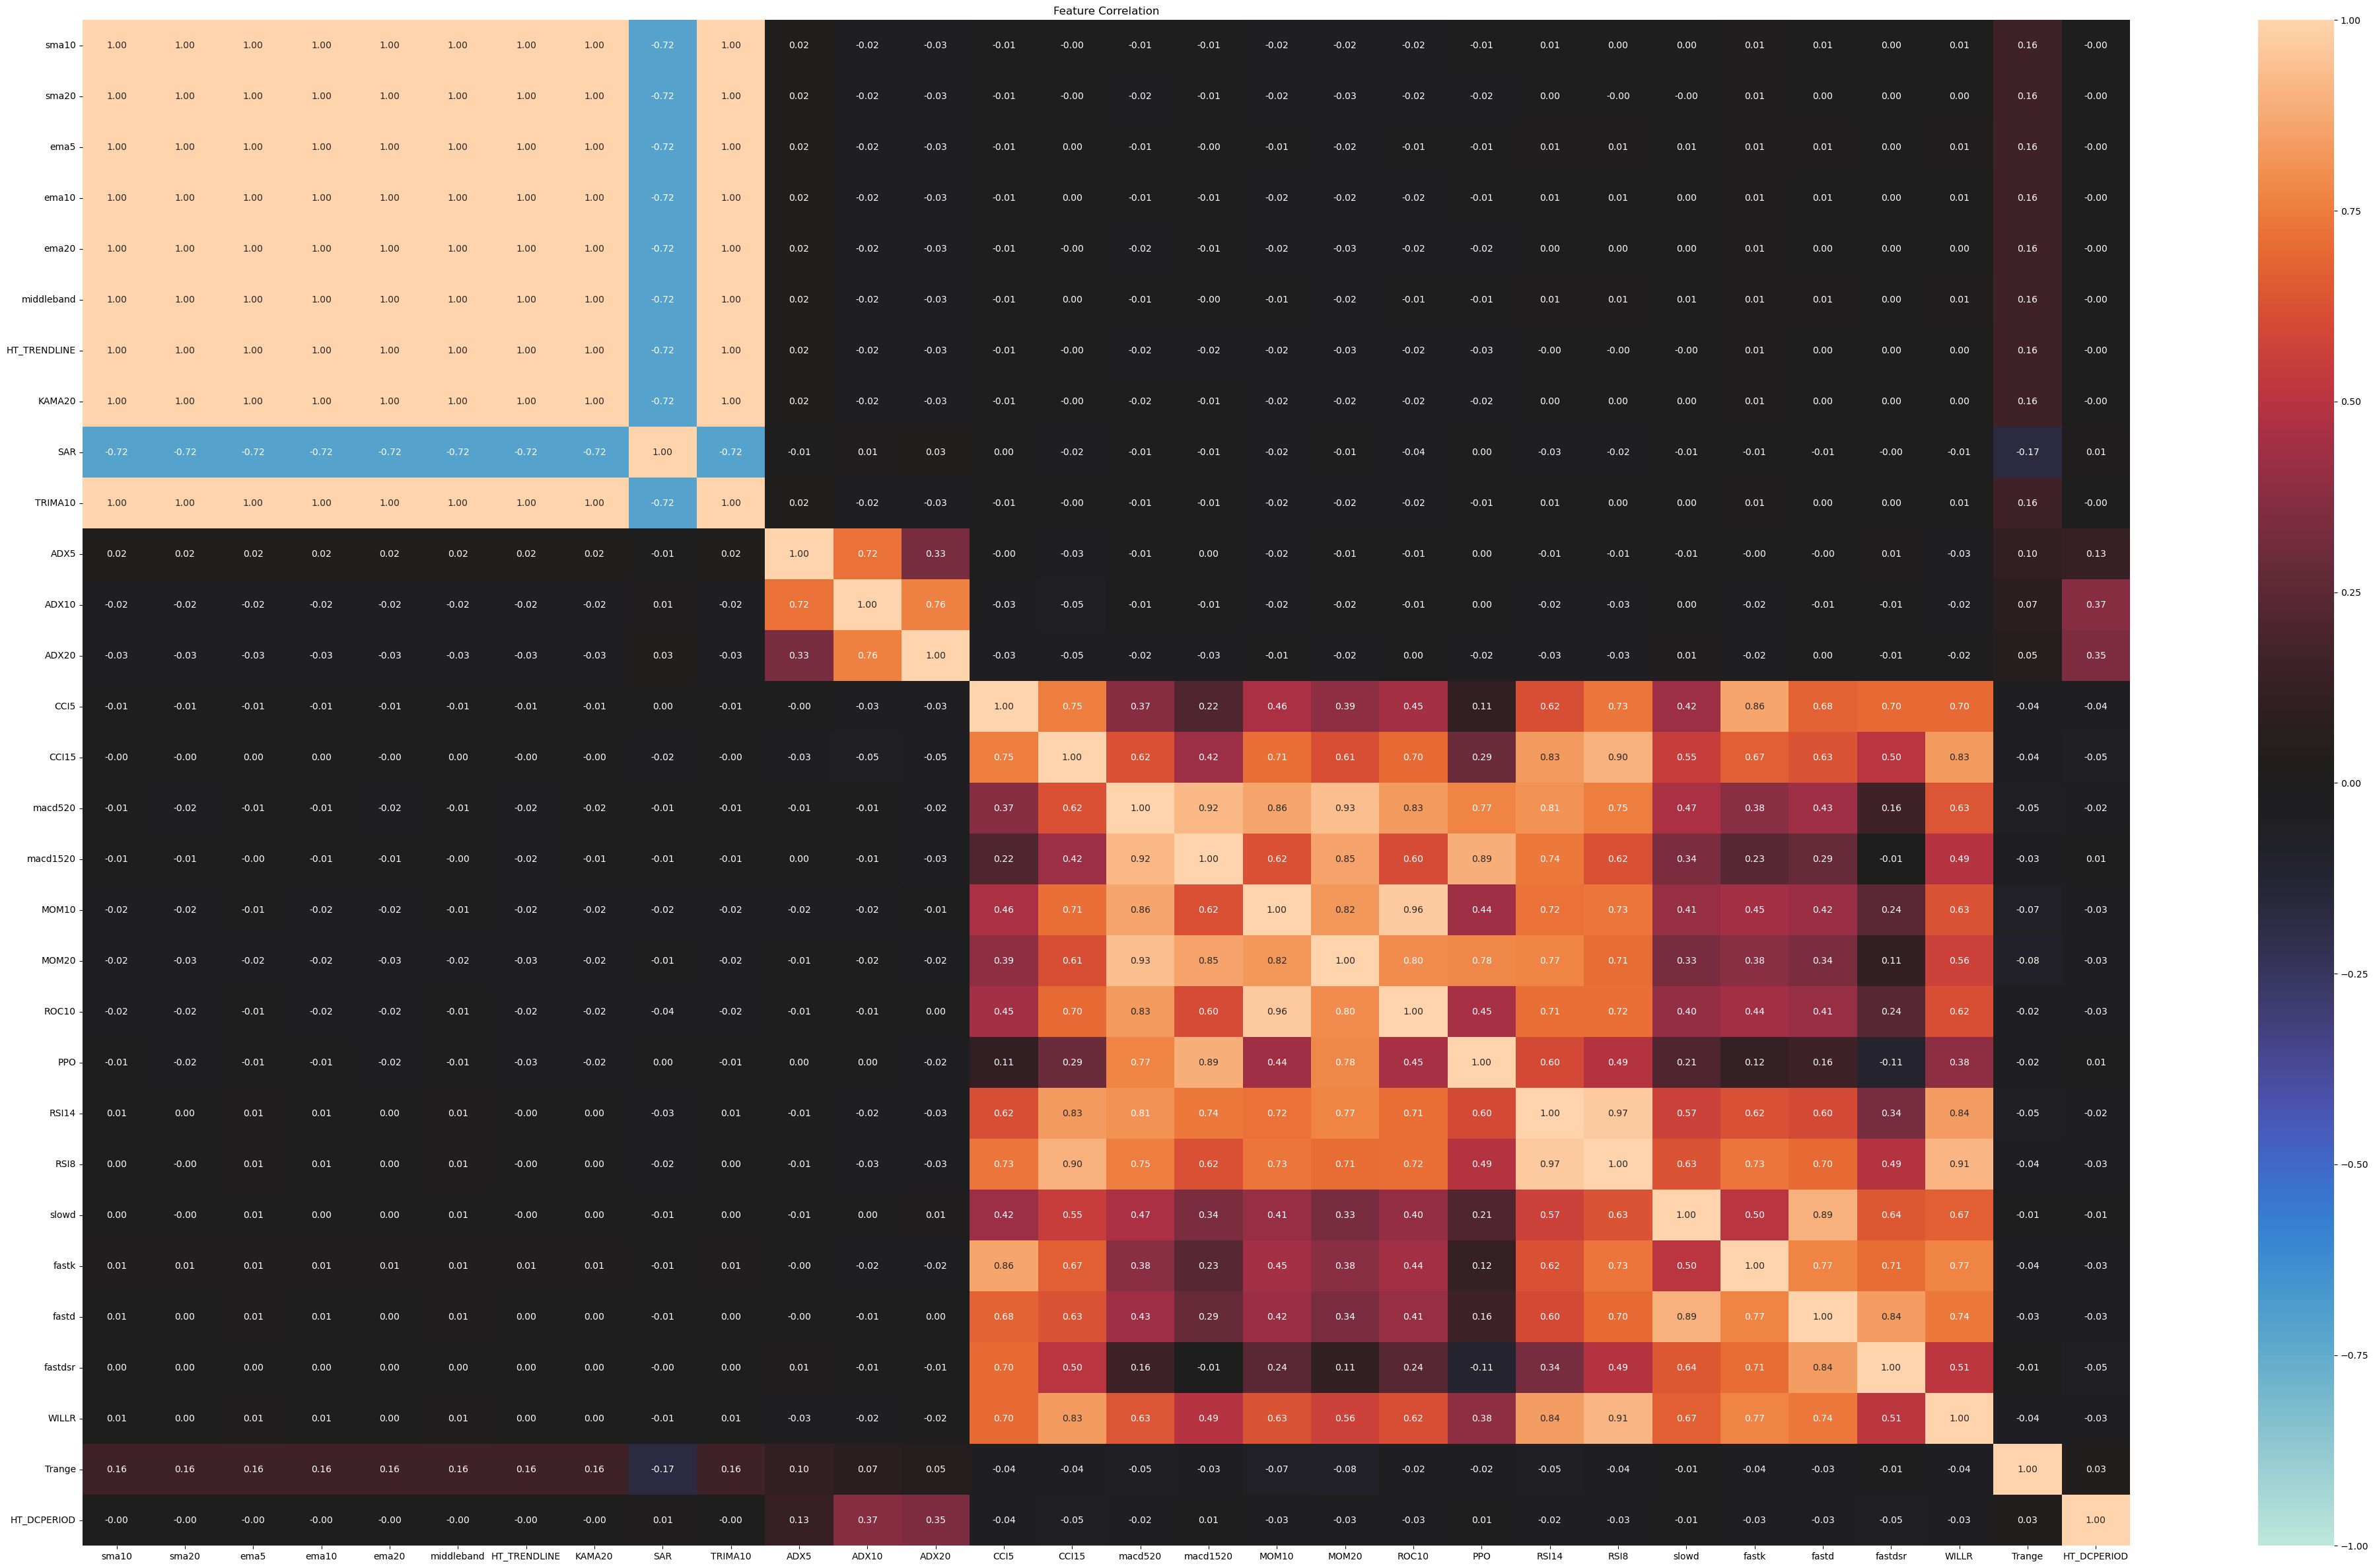

In [103]:
#Checking Correlations (all features)
fig = plt.subplots(figsize=(50, 30))
sns.heatmap(df4.corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Feature Correlation', fontsize=12)

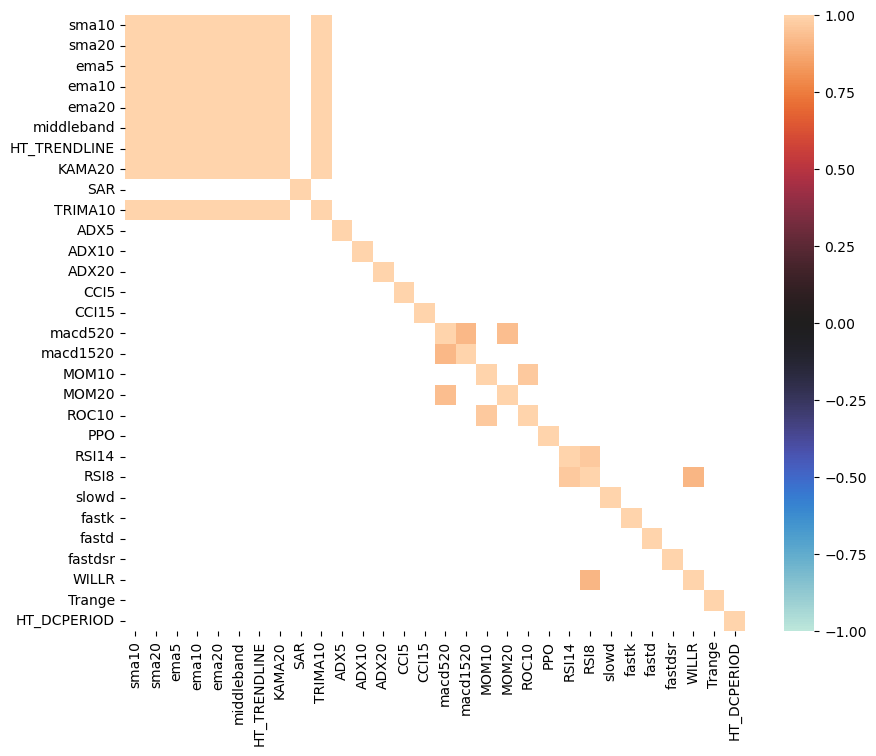

In [104]:
#Checking Correlations for feature which are 90% relavent [dimentionality reduction]
fig = plt.subplots(figsize=(10, 8)) 
corr = df4.corr()
sns.heatmap(corr[corr>0.9], vmax=1, vmin=-1, center=0)
plt.show()

In [105]:
# - sma10,sma20,ema5,ema10,ema20,middleband,HT_TRENDLINE,KAMA20,SAR,TRIMA1O   are similar
#we will chose ema5

# - macd520,macd1520,MOM2O  are similar 
# we will chose macd520

# - MOM10,ROC10 are similar
# we will chose MOM10


# - RSI14,RSI8,WILLR are similar
# we will chose RSI8



In [106]:
variables_to_remove2 =[
    'sma10', 'sma20', 'ema10', 'ema20',
    'middleband', 'HT_TRENDLINE', 'KAMA20', 'SAR',
    'TRIMA10',
    'macd1520', 'MOM20',
    'ROC10', 'RSI14',
    'WILLR'
]

In [107]:
# Remove the variables listed in 'variables_to_remove' from the dataset
df4 = df4.drop(columns=variables_to_remove2, errors='ignore')

In [108]:
df4.shape

(213000, 16)

Text(0.5, 1.0, 'Feature Correlation')

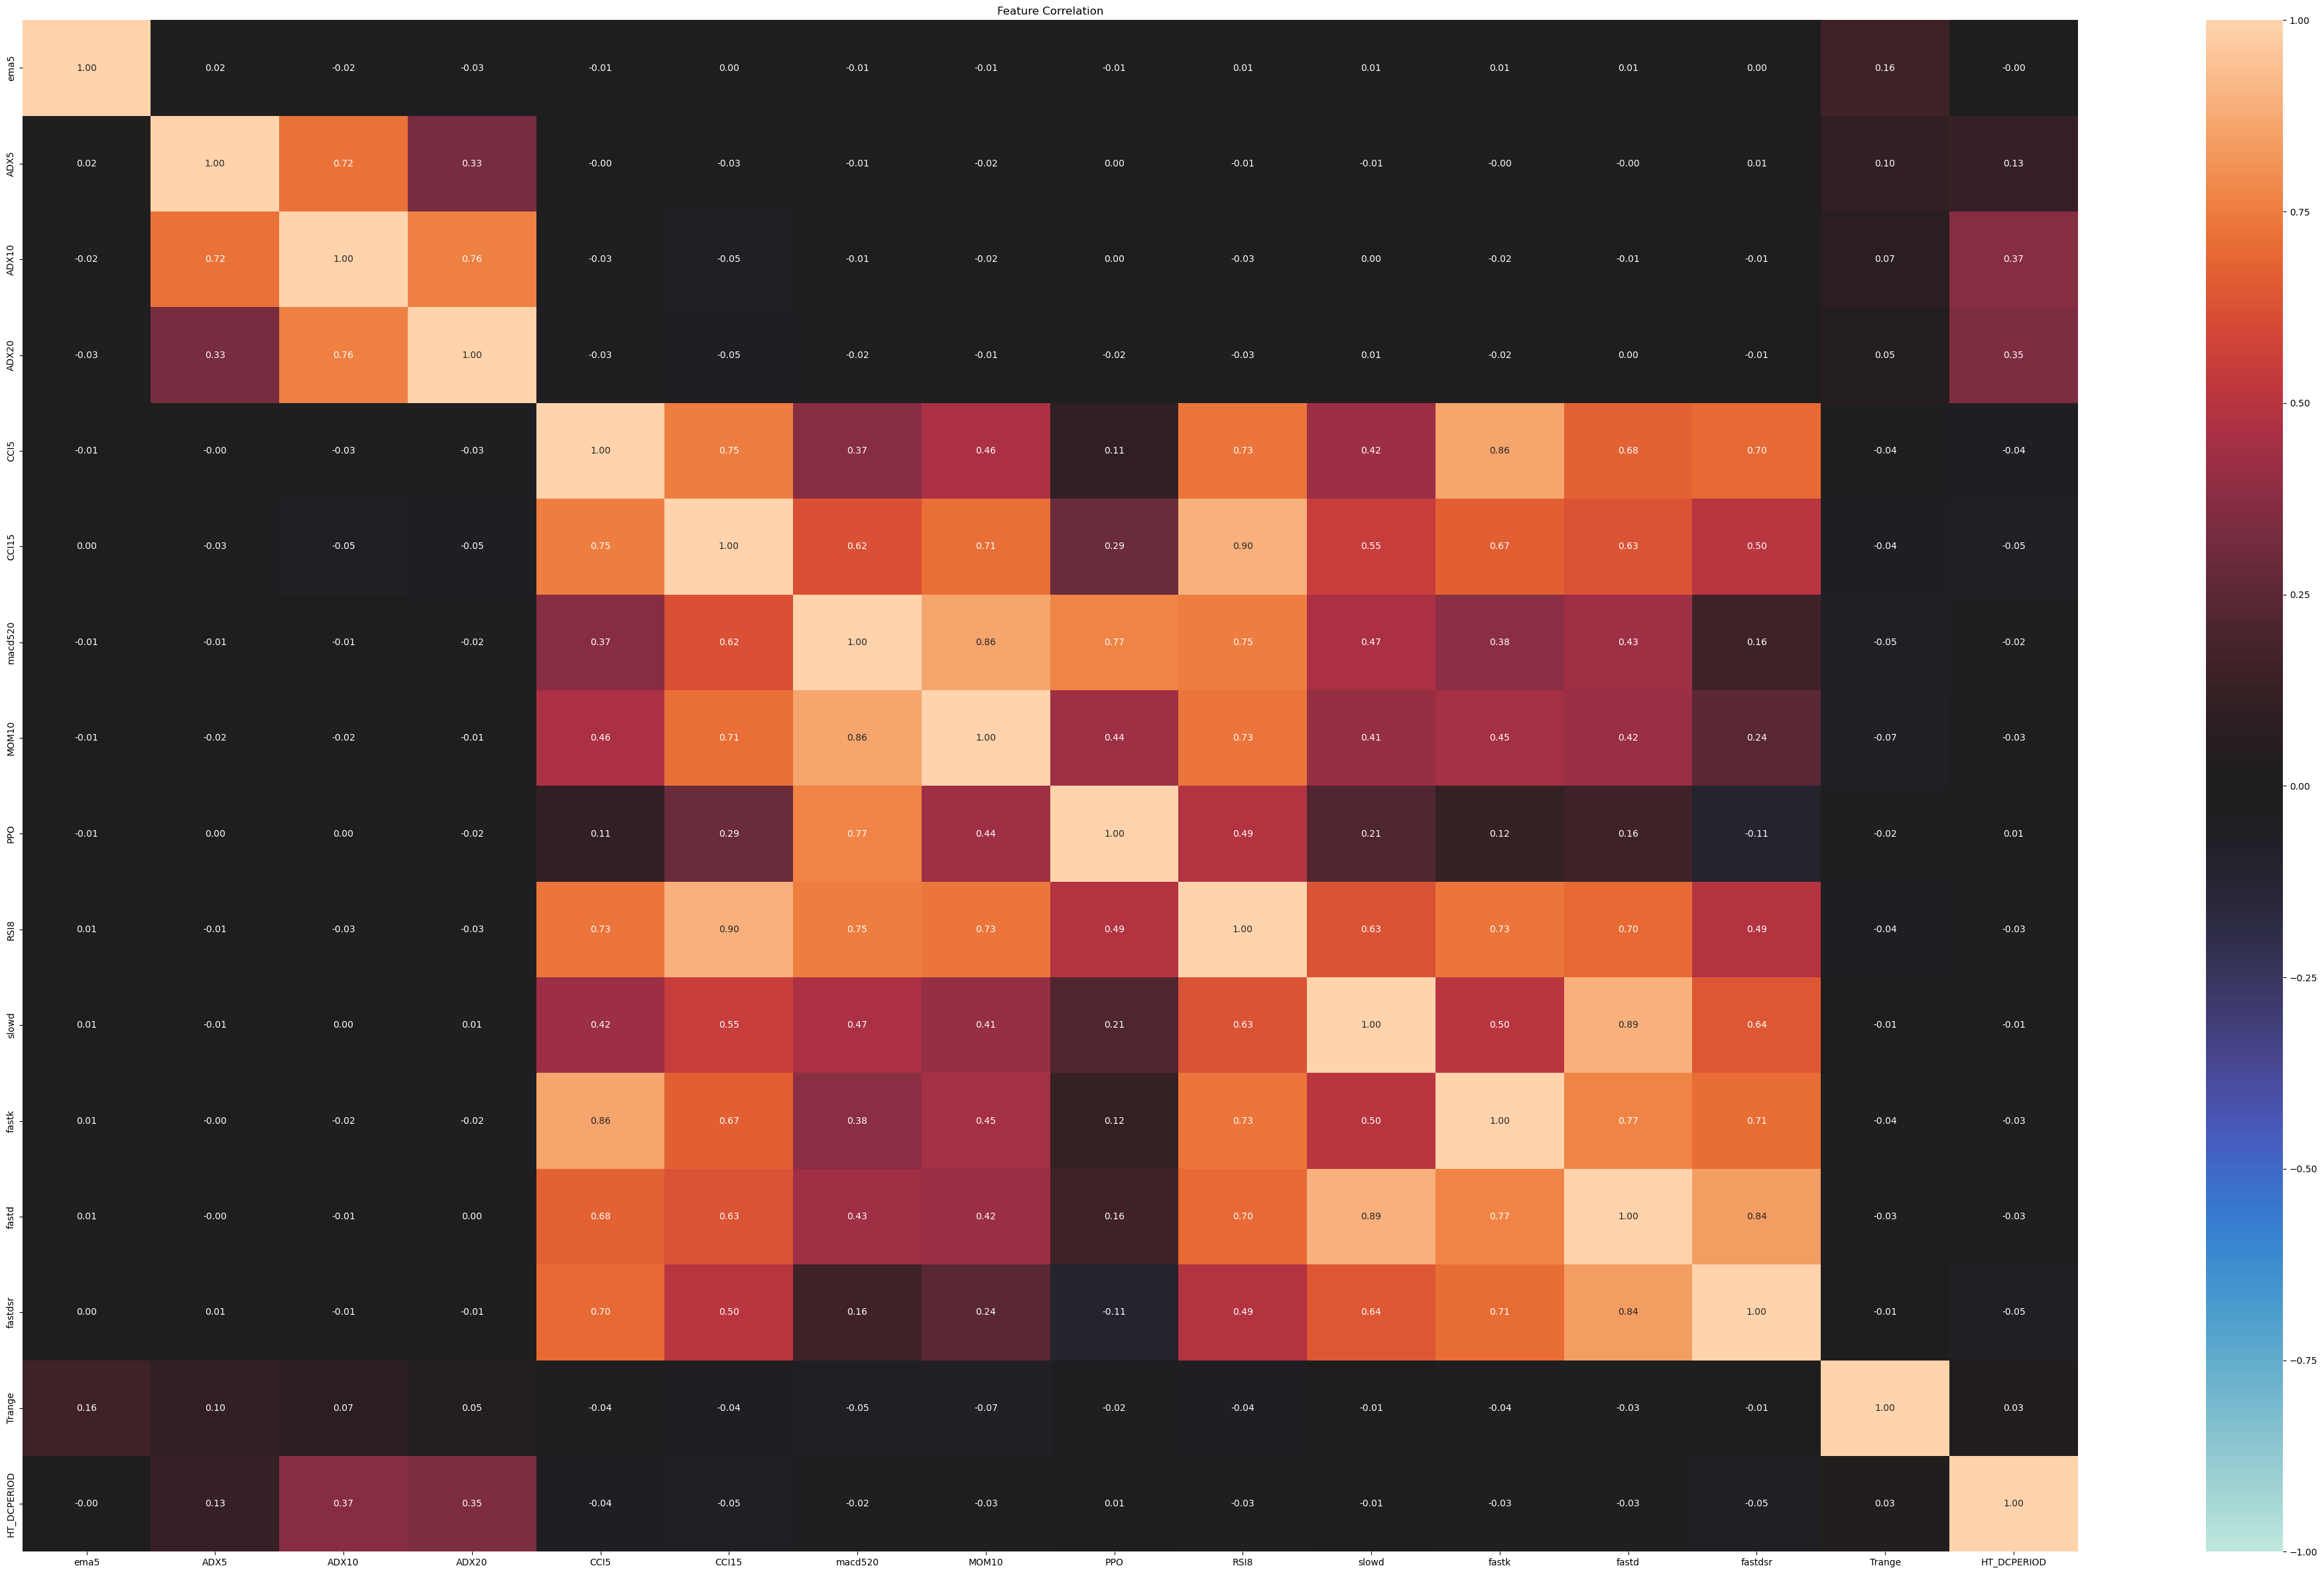

In [109]:
#Checking Correlations (all features)
fig = plt.subplots(figsize=(50, 30))
sns.heatmap(df4.corr(), annot=True, fmt='.2f', vmin=-1.0, vmax=1.0, center=0)
plt.title('Feature Correlation', fontsize=12)

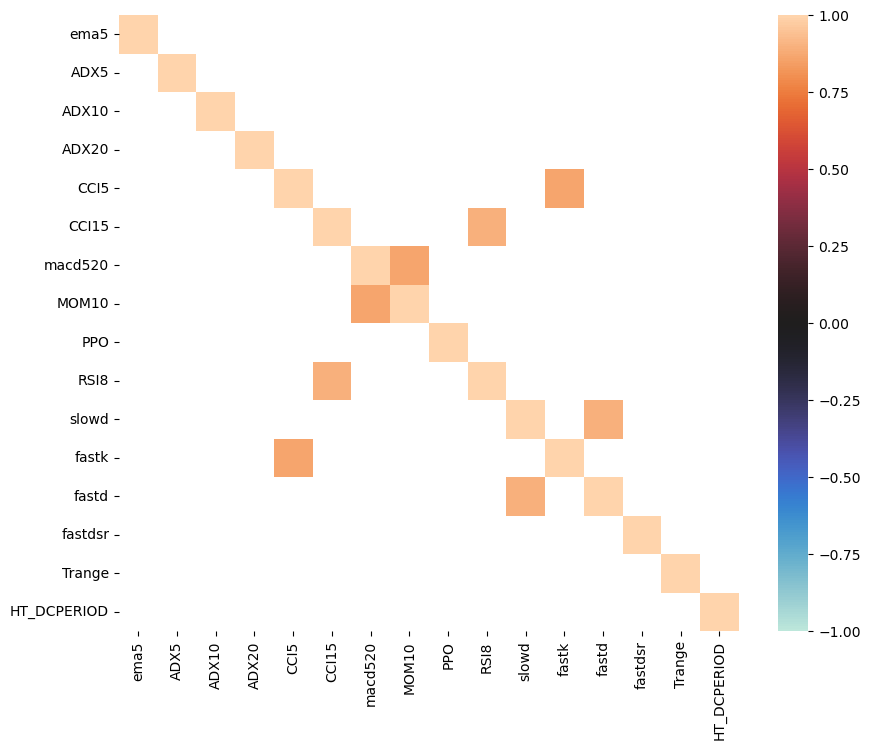

In [110]:
#Checking Correlations for feature which are 90% relavent [dimentionality reduction]
fig = plt.subplots(figsize=(10, 8)) 
corr = df4.corr()
sns.heatmap(corr[corr>0.86], vmax=1, vmin=-1, center=0)
plt.show()

In [111]:
# - CCI5, fastk are similar = fastk
# - RSI8,CCI15 are simlar= RSI8
# - MOM10 , macd520 are similar = macd520
# - slowd,fastd are similar = slowd

In [112]:
variables_to_remove3=['CCI5','CCI15','MOM10','fastd']
    

In [113]:
# Remove the variables listed in 'variables_to_remove' from the dataset
df4 = df4.drop(columns=variables_to_remove3, errors='ignore')


In [114]:
df4.head()

ema5       ADX5      ADX10      ADX20  \
date                                                                       
2015-01-12 09:15:00+05:30  18600.314495  47.985341  29.104182  33.884770   
2015-01-12 09:20:00+05:30  18582.209664  47.845621  28.580600  33.303026   
2015-01-12 09:25:00+05:30  18574.956442  49.191658  28.658527  32.900212   
2015-01-12 09:30:00+05:30  18573.220962  47.859249  28.240828  32.395716   
2015-01-12 09:35:00+05:30  18570.163974  45.459890  27.607571  31.853749   

                             macd520       PPO       RSI8      slowd  \
date                                                                   
2015-01-12 09:15:00+05:30   5.882081  0.153494  38.869985  45.779265   
2015-01-12 09:20:00+05:30  -7.610140  0.157186  36.061738  28.937061   
2015-01-12 09:25:00+05:30 -12.066237  0.156177  41.380349  20.769975   
2015-01-12 09:30:00+05:30 -12.156701  0.157501  44.760192  19.862995   
2015-01-12 09:35:00+05:30 -13.182482  0.139015  43.022654  25.312039   

                               fastk       fastdsr  Trange  HT_DCPERIOD  
date                                                                     
2015-01-12 09:15:00+05:30  19.595278  8.427208e+00  101.90    21.334048  
2015-01-12 09:20:00+05:30  11.959383  1.184238e-14   39.20    21.753220  
2015-01-12 09:25:00+05:30  24.674797  6.399205e+00   33.95    22.013101  
2015-01-12 09:30:00+05:30  38.476468  2.563916e+01   39.20    22.095481  
2015-01-12 09:35:00+05:30  33.316977  5.199019e+01   12.65    22.217191

In [115]:
df4.shape

(213000, 12)

In [116]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = df4.columns
vif_data['VIF'] = [variance_inflation_factor(df4.values, i) for i in range(df4.shape[1])]

# Print the VIF values
print(vif_data)

       Variable        VIF
0          ema5  12.398241
1          ADX5  22.543728
2         ADX10  43.138858
3         ADX20  19.312413
4       macd520   3.993004
5           PPO   2.879723
6          RSI8  39.766708
7         slowd  15.300497
8         fastk  15.833399
9       fastdsr  11.652779
10       Trange   1.468700
11  HT_DCPERIOD  17.373567


In [117]:
# Function to calculate VIF and remove features with high multicollinearity
def calculate_vif(data, threshold=10):
    """
    Calculates VIF and removes features with VIF > threshold.

    :param data: DataFrame containing features
    :param threshold: VIF threshold to drop features
    :return: DataFrame with selected features
    """
    features = data.copy()

    while True:
        # Calculate VIF for all features
        vif = pd.DataFrame()
        vif["Feature"] = features.columns
        vif["VIF"] = [
            variance_inflation_factor(features.values, i) for i in range(features.shape[1])
        ]

        # Find the feature with the highest VIF
        max_vif = vif["VIF"].max()

        if max_vif > threshold:
            # Drop the feature with the highest VIF
            drop_feature = vif.loc[vif["VIF"].idxmax(), "Feature"]
            print(f"Dropping feature: {drop_feature} (VIF: {max_vif})")
            features = features.drop(columns=[drop_feature])
        else:
            break

    return features

# Apply the VIF-based feature selection
# Use only numeric columns for multicollinearity check
numeric_features = df4.select_dtypes(include=[np.number])
selected_features = calculate_vif(numeric_features, threshold=10)

# Display the selected features
print("Selected Features:")
print(selected_features.columns)

Dropping feature: ADX10 (VIF: 43.13885795497569)
Dropping feature: RSI8 (VIF: 39.342226412777435)
Dropping feature: HT_DCPERIOD (VIF: 15.508476023089068)
Dropping feature: slowd (VIF: 12.196960352596347)
Selected Features:
Index(['ema5', 'ADX5', 'ADX20', 'macd520', 'PPO', 'fastk', 'fastdsr',
       'Trange'],
      dtype='object')


In [118]:
variables_to_remove4=['ADX10','RSI8','HT_DCPERIOD','slowd']

In [119]:
# Remove the variables listed in 'variables_to_remove' from the dataset
df4 = df4.drop(columns=variables_to_remove4, errors='ignore')

In [120]:
df4.shape

(213000, 8)

In [121]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Variable'] = df4.columns
vif_data['VIF'] = [variance_inflation_factor(df4.values, i) for i in range(df4.shape[1])]

# Print the VIF values
print(vif_data)

  Variable       VIF
0     ema5  8.169743
1     ADX5  8.634932
2    ADX20  6.563457
3  macd520  3.069886
4      PPO  2.834587
5    fastk  9.749837
6  fastdsr  7.915512
7   Trange  1.467024


In [122]:
#multicoliinearity is removed form the exogeneous variables dataset 

In [123]:

# List of variables to extract
variables = ['close','ema5', 'ADX5', 'ADX20', 'macd520', 'PPO', 'fastk', 'fastdsr', 'Trange']

# Extract the specified columns
df_arimax = df_arima[variables]



In [124]:
df_arimax.shape

(213000, 9)

In [125]:
df_arimax.head()

close          ema5       ADX5      ADX20  \
date                                                                      
2015-01-12 09:15:00+05:30  18559.15  18600.314495  47.985341  33.884770   
2015-01-12 09:20:00+05:30  18546.00  18582.209664  47.845621  33.303026   
2015-01-12 09:25:00+05:30  18560.45  18574.956442  49.191658  32.900212   
2015-01-12 09:30:00+05:30  18569.75  18573.220962  47.859249  32.395716   
2015-01-12 09:35:00+05:30  18564.05  18570.163974  45.459890  31.853749   

                             macd520       PPO      fastk       fastdsr  \
date                                                                      
2015-01-12 09:15:00+05:30   5.882081  0.153494  19.595278  8.427208e+00   
2015-01-12 09:20:00+05:30  -7.610140  0.157186  11.959383  1.184238e-14   
2015-01-12 09:25:00+05:30 -12.066237  0.156177  24.674797  6.399205e+00   
2015-01-12 09:30:00+05:30 -12.156701  0.157501  38.476468  2.563916e+01   
2015-01-12 09:35:00+05:30 -13.182482  0.139015  33.316977  5.199019e+01   

                           Trange  
date                               
2015-01-12 09:15:00+05:30  101.90  
2015-01-12 09:20:00+05:30   39.20  
2015-01-12 09:25:00+05:30   33.95  
2015-01-12 09:30:00+05:30   39.20  
2015-01-12 09:35:00+05:30   12.65

### splitting the dataset

In [127]:
# # Calculate the split index (80% of the data)
# split_index = int(len(df_arimax) * 0.8)

# # Split the data into train and test sets
# train_data2 = df_arimax.iloc[:split_index]
# test_data2 = df_arimax.iloc[split_index:]

In [128]:
# train_data2.shape

In [129]:
# train_data2.head()

In [130]:
# exog_train, exog_test = train_data2.iloc[:,1:],test_data2.iloc[:,1:]

In [131]:
# exog_train.head()

In [132]:
# # auto_arima() from pmdarima - used to automatically select the optimal parameters for an ARIMA model based on the provided time series data.
# # m = The number of periods in each season.
# # X =  exogenous variables.
# model_arimax = auto_arima(train_data2['close'],
#                            seasonality = False,
#                            X = exog_train)
# model_arimax.summary()

In [133]:
# # Use the fitted SARIMAX model to forecast future values.
# # set the number of periods to forecast to the length of 'test'
# # X - representing the exogenous variables for forecasting
# predictions_arimax = model_arimax.predict(n_periods = len(test_data2),
#                                             X = exog_test)
# predictions_arimax

In [134]:
# #setting the prediction index to test data index 
# predictions_arimax.index = test_data2.index

In [135]:
# # Model assessment
# model_assessment(train_data2['close'], test_data2['close'], predictions_arimax, "ARIMAX")

# stacked lstm

In [137]:
filtered_df.shape

(213000, 58)

In [138]:
filtered_df.head(1)

close     high      low     open  volume  \
date                                                                     
2015-01-12 09:15:00+05:30  18559.15  18632.0  18530.1  18632.0     0.0   

                               sma5     sma10         sma15       sma20  \
date                                                                      
2015-01-12 09:15:00+05:30  18619.69  18612.29  18590.706667  18573.4375   

                                   ema5  ...      fastd  fastksr   fastdsr  \
date                                     ...                                 
2015-01-12 09:15:00+05:30  18600.314495  ...  27.757822      0.0  8.427208   

                              ULTOSC      WILLR        ATR  Trange  TYPPRICE  \
date                                                                           
2015-01-12 09:15:00+05:30  45.918057 -68.446741  41.926807   101.9  18573.75   

                           HT_DCPERIOD     BETA  
date                                             
2015-01-12 09:15:00+05:30    21.334048  0.98271  

[1 rows x 58 columns]

In [139]:
# Extract Time Variables
filtered_df['year'] = filtered_df.index.year
filtered_df['month'] = filtered_df.index.month
filtered_df['day'] = filtered_df.index.day
filtered_df['weekday'] = filtered_df.index.day_name()
filtered_df['weekday_numeric'] = filtered_df.index.weekday

# 5 & 6 is for Saturday and Sunday
filtered_df['is_weekend'] = filtered_df.index.weekday > 4

filtered_df.head()

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/1071544897.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df.index.year
/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/1071544897.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['month'] = filtered_df.index.month
/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_42793/1071544897.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...  Trange      TYPPRICE  \
date                                     ...                         
2015-01-12 09:15:00+05:30  18600.314495  ...  101.90  18573.750000   
2015-01-12 09:20:00+05:30  18582.209664  ...   39.20  18559.066667   
2015-01-12 09:25:00+05:30  18574.956442  ...   33.95  18553.066667   
2015-01-12 09:30:00+05:30  18573.220962  ...   39.20  18558.850000   
2015-01-12 09:35:00+05:30  18570.163974  ...   12.65  18568.033333   

                           HT_DCPERIOD      BETA  year  month  day  weekday  \
date                                                                          
2015-01-12 09:15:00+05:30    21.334048  0.982710  2015      1   12   Monday   
2015-01-12 09:20:00+05:30    21.753220 -1.153971  2015      1   12   Monday   
2015-01-12 09:25:00+05:30    22.013101 -1.229017  2015      1   12   Monday   
2015-01-12 09:30:00+05:30    22.095481 -0.604320  2015      1   12   Monday   
2015-01-12 09:35:00+05:30    22.217191 -0.273776  2015      1   12   Monday   

                           weekday_numeric  is_weekend  
date                                                    
2015-01-12 09:15:00+05:30                0       False  
2015-01-12 09:20:00+05:30                0       False  
2015-01-12 09:25:00+05:30                0       False  
2015-01-12 09:30:00+05:30                0       False  
2015-01-12 09:35:00+05:30                0       False  

[5 rows x 64 columns]

In [140]:
#see how many saturdays are there

# Select rows where the value in 'is_weekend' column is True using .loc
weekend_rows2 = filtered_df.loc[filtered_df['is_weekend'] == True]

# Display the rows
print(weekend_rows2)

                           close  high  low  open  volume  sma5  sma10  sma15  \
date                                                                            
2015-01-17 09:15:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2015-01-17 09:20:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2015-01-17 09:25:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2015-01-17 09:30:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2015-01-17 09:35:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
...                          ...   ...  ...   ...     ...   ...    ...    ...   
2022-10-16 15:05:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2022-10-16 15:10:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2022-10-16 15:15:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2022-10-16 15:20:00+05:30    NaN   NaN  NaN   NaN     NaN   NaN    NaN    NaN   
2022-10-16 15:25:00+05:30   

In [141]:
filtered_df = filtered_df.loc[filtered_df['is_weekend'] != True]

In [142]:
filtered_df.shape

(152250, 64)

In [143]:
missing_values = filtered_df[filtered_df.isnull().any(axis=1)].index


In [144]:
print(missing_values)

DatetimeIndex(['2015-01-16 09:15:00+05:30', '2015-01-16 09:20:00+05:30',
               '2015-01-16 09:25:00+05:30', '2015-01-16 09:30:00+05:30',
               '2015-01-16 09:35:00+05:30', '2015-01-16 09:40:00+05:30',
               '2015-01-16 09:45:00+05:30', '2015-01-16 09:50:00+05:30',
               '2015-01-16 09:55:00+05:30', '2015-01-16 10:00:00+05:30',
               ...
               '2022-10-06 14:40:00+05:30', '2022-10-06 14:45:00+05:30',
               '2022-10-06 14:50:00+05:30', '2022-10-06 14:55:00+05:30',
               '2022-10-06 15:00:00+05:30', '2022-10-06 15:05:00+05:30',
               '2022-10-06 15:10:00+05:30', '2022-10-06 15:15:00+05:30',
               '2022-10-06 15:20:00+05:30', '2022-10-06 15:25:00+05:30'],
              dtype='datetime64[ns, UTC+05:30]', name='date', length=16360, freq=None)


In [145]:
# filtered_df.interpolate()

In [146]:
filtered_df.head()

close      high      low      open  volume  \
date                                                                       
2015-01-12 09:15:00+05:30  18559.15  18632.00  18530.1  18632.00     0.0   
2015-01-12 09:20:00+05:30  18546.00  18585.20  18546.0  18559.15     0.0   
2015-01-12 09:25:00+05:30  18560.45  18566.35  18532.4  18546.00     0.0   
2015-01-12 09:30:00+05:30  18569.75  18573.00  18533.8  18560.45     0.0   
2015-01-12 09:35:00+05:30  18564.05  18576.35  18563.7  18569.75     0.0   

                               sma5      sma10         sma15       sma20  \
date                                                                       
2015-01-12 09:15:00+05:30  18619.69  18612.290  18590.706667  18573.4375   
2015-01-12 09:20:00+05:30  18596.28  18609.355  18591.503333  18574.7825   
2015-01-12 09:25:00+05:30  18579.36  18604.050  18592.763333  18577.4825   
2015-01-12 09:30:00+05:30  18566.68  18601.850  18596.096667  18579.9075   
2015-01-12 09:35:00+05:30  18559.88  18597.695  18596.180000  18582.4025   

                                   ema5  ...  Trange      TYPPRICE  \
date                                     ...                         
2015-01-12 09:15:00+05:30  18600.314495  ...  101.90  18573.750000   
2015-01-12 09:20:00+05:30  18582.209664  ...   39.20  18559.066667   
2015-01-12 09:25:00+05:30  18574.956442  ...   33.95  18553.066667   
2015-01-12 09:30:00+05:30  18573.220962  ...   39.20  18558.850000   
2015-01-12 09:35:00+05:30  18570.163974  ...   12.65  18568.033333   

                           HT_DCPERIOD      BETA  year  month  day  weekday  \
date                                                                          
2015-01-12 09:15:00+05:30    21.334048  0.982710  2015      1   12   Monday   
2015-01-12 09:20:00+05:30    21.753220 -1.153971  2015      1   12   Monday   
2015-01-12 09:25:00+05:30    22.013101 -1.229017  2015      1   12   Monday   
2015-01-12 09:30:00+05:30    22.095481 -0.604320  2015      1   12   Monday   
2015-01-12 09:35:00+05:30    22.217191 -0.273776  2015      1   12   Monday   

                           weekday_numeric  is_weekend  
date                                                    
2015-01-12 09:15:00+05:30                0       False  
2015-01-12 09:20:00+05:30                0       False  
2015-01-12 09:25:00+05:30                0       False  
2015-01-12 09:30:00+05:30                0       False  
2015-01-12 09:35:00+05:30                0       False  

[5 rows x 64 columns]

In [147]:
filtered_df2=filtered_df.iloc[:,:-6]

In [148]:
filtered_df2.head(1)

close     high      low     open  volume  \
date                                                                     
2015-01-12 09:15:00+05:30  18559.15  18632.0  18530.1  18632.0     0.0   

                               sma5     sma10         sma15       sma20  \
date                                                                      
2015-01-12 09:15:00+05:30  18619.69  18612.29  18590.706667  18573.4375   

                                   ema5  ...      fastd  fastksr   fastdsr  \
date                                     ...                                 
2015-01-12 09:15:00+05:30  18600.314495  ...  27.757822      0.0  8.427208   

                              ULTOSC      WILLR        ATR  Trange  TYPPRICE  \
date                                                                           
2015-01-12 09:15:00+05:30  45.918057 -68.446741  41.926807   101.9  18573.75   

                           HT_DCPERIOD     BETA  
date                                             
2015-01-12 09:15:00+05:30    21.334048  0.98271  

[1 rows x 58 columns]

In [149]:
df_lstm=filtered_df2.interpolate()

In [150]:
df_lstm.isnull().sum()

close           0
high            0
low             0
open            0
volume          0
sma5            0
sma10           0
sma15           0
sma20           0
ema5            0
ema10           0
ema15           0
ema20           0
upperband       0
middleband      0
lowerband       0
HT_TRENDLINE    0
KAMA10          0
KAMA20          0
KAMA30          0
SAR             0
TRIMA5          0
TRIMA10         0
TRIMA20         0
ADX5            0
ADX10           0
ADX20           0
APO             0
CCI5            0
CCI10           0
CCI15           0
macd510         0
macd520         0
macd1020        0
macd1520        0
macd1226        0
MOM10           0
MOM15           0
MOM20           0
ROC5            0
ROC10           0
ROC20           0
PPO             0
RSI14           0
RSI8            0
slowk           0
slowd           0
fastk           0
fastd           0
fastksr         0
fastdsr         0
ULTOSC          0
WILLR           0
ATR             0
Trange          0
TYPPRICE  

In [151]:
df_lstm.shape

(152250, 58)

<Axes: xlabel='date'>

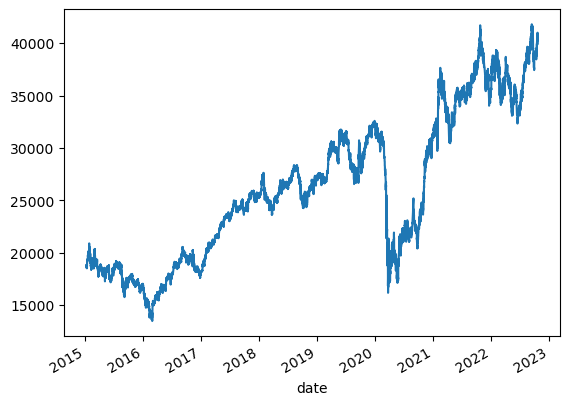

In [152]:
df_lstm['close'].plot()

In [153]:
from sklearn.preprocessing import MinMaxScaler


In [154]:

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df_lstm['close'].values.reshape(-1, 1))

# Function to create dataset in the format required for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # X is the window of the last 'time_step' data points
        y.append(data[i + time_step, 0])  # y is the next value after the window
    return np.array(X), np.array(y)

# Choose your time_step (e.g., 60 for using the past 60 days)
time_step = 100

# Create the LSTM input data (X_train, y_train)
X, y = create_dataset(scaled_data, time_step)

# Reshape X to be in the form (samples, timesteps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)  # 1 feature (univariate)

# Split into training data (X_train, y_train) and test data (if required)
train_size = int(len(X) * 0.8)  # 80% for training, 20% for testing (adjust as needed)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Now you have X_train and y_train ready to be used with your LSTM model
print(X_train.shape, y_train.shape)  # Should print (samples, timesteps, features) for X_train


(121719, 100, 1) (121719,)


In [155]:
len(X)

152149

In [156]:
X_test.shape

(30430, 100, 1)

In [157]:
!pip install tensorflow 


In [158]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from keras.layers import Bidirectional

In [159]:
#stacked lstm model

n_features = 1
n_steps = 10

model_lstm = Sequential()
model_lstm.add(LSTM(34, activation='relu', input_shape=(n_steps, n_features), return_sequences=True))
model_lstm.add(LSTM(68, activation='relu', return_sequences=True))
model_lstm.add(LSTM(128, activation='relu', return_sequences=True))
model_lstm.add(LSTM(68, activation='relu', return_sequences=True))
model_lstm.add(LSTM(34, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
model_lstm.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 34)         │         4,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 10, 68)         │        28,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 10, 128)        │       100,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 10, 68)         │        53,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 34)             │        14,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            35 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 201,403 (786.73 KB)

 Trainable params: 201,403 (786.73 KB)

 Non-trainable params: 0 (0.00 B)

In [160]:
# mse_train = list()
# mse_val = list()
# for epoch in range(5,55,5):
#     # fit the model with epochs
#     model_fit = model_lstm.fit(X_train, y_train, epochs=epoch, verbose=1, validation_data=(X_test, y_test))  # Automatically compute validation loss
    
    
#     #model evaluation
#     Train_pred = model_lstm.predict(X_train, verbose=0)
#     Val_pred = model_lstm.predict(X_test, verbose=0)
    
#     #computing the training and validation loss
#     mse_t = mean_squared_error(Train_pred, y_train)
#     mse_v = mean_squared_error(Val_pred, y_test)
#     mse_train.append(mse_t)
#     mse_val.append(mse_v)

In [161]:
model_lstm.fit(X_train, y_train, epochs=10, batch_size=512,verbose=1,validation_data=(X_test,y_test))


Epoch 1/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 181s 753ms/step - loss: 0.0301 - val_loss: 1.4107e-04
Epoch 2/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 176s 739ms/step - loss: 3.2223e-05 - val_loss: 5.8043e-05
Epoch 3/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 177s 745ms/step - loss: 2.9735e-05 - val_loss: 5.3068e-05
Epoch 4/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 178s 746ms/step - loss: 3.1266e-05 - val_loss: 5.5674e-05
Epoch 5/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 178s 748ms/step - loss: 2.9344e-05 - val_loss: 6.5929e-05
Epoch 6/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 178s 748ms/step - loss: 2.9111e-05 - val_loss: 1.1676e-04
Epoch 7/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 177s 742ms/step - loss: 2.8220e-05 - val_loss: 5.9454e-05
Epoch 8/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 184s 773ms/step - loss: 2.8517e-05 - val_loss: 6.4132e-05
Epoch 9/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 183s 770ms/step - loss: 2.3205e-05 - val_loss: 5.5118e-05
Epoch 10/10
238/238 ━━━━━━━━━━━━━━━━━━━━ 193s 812ms/step - loss: 2.3933e-05 - val_loss: 7.6476e-05


In [162]:
Train_pred = model_lstm.predict(X_train, verbose=0)
Val_pred = model_lstm.predict(X_test, verbose=0)

#computing the training and validation loss
mse_t = mean_squared_error(Train_pred, y_train)
mse_v = mean_squared_error(Val_pred, y_test)


In [163]:
mse_t,mse_v

(2.088208965640765e-05, 7.647585487331914e-05)

In [164]:
print(Val_pred)

[[0.7172133 ]
 [0.71694726]
 [0.71662045]
 ...
 [0.933427  ]
 [0.93318987]
 [0.9331851 ]]


In [165]:


# # Create a figure for plotting
# plt.figure(figsize=(14, 7))

# # Plot the actual data (df_lstm)
# plt.plot(range(len(df_lstm)), df_lstm, label="Original Data", color='blue', alpha=0.7)

# # Plot training predictions
# plt.plot(range(len(Train_pred)), Train_pred, label="Train Predictions", color='green', alpha=0.7)

# # Plot testing predictions (offset for test data to match timeline)
# test_offset = len(df_lstm) - len(X_test)  # Adjust starting index
# plt.plot(range(test_offset, test_offset + len(Val_pred)), Val_pred, label="Test Predictions", color='red', alpha=0.7)

# # Add labels and title
# plt.title("LSTM Model Predictions vs Original Data")
# plt.xlabel("Time Steps")
# plt.ylabel("Values")
# plt.legend()
# plt.show()


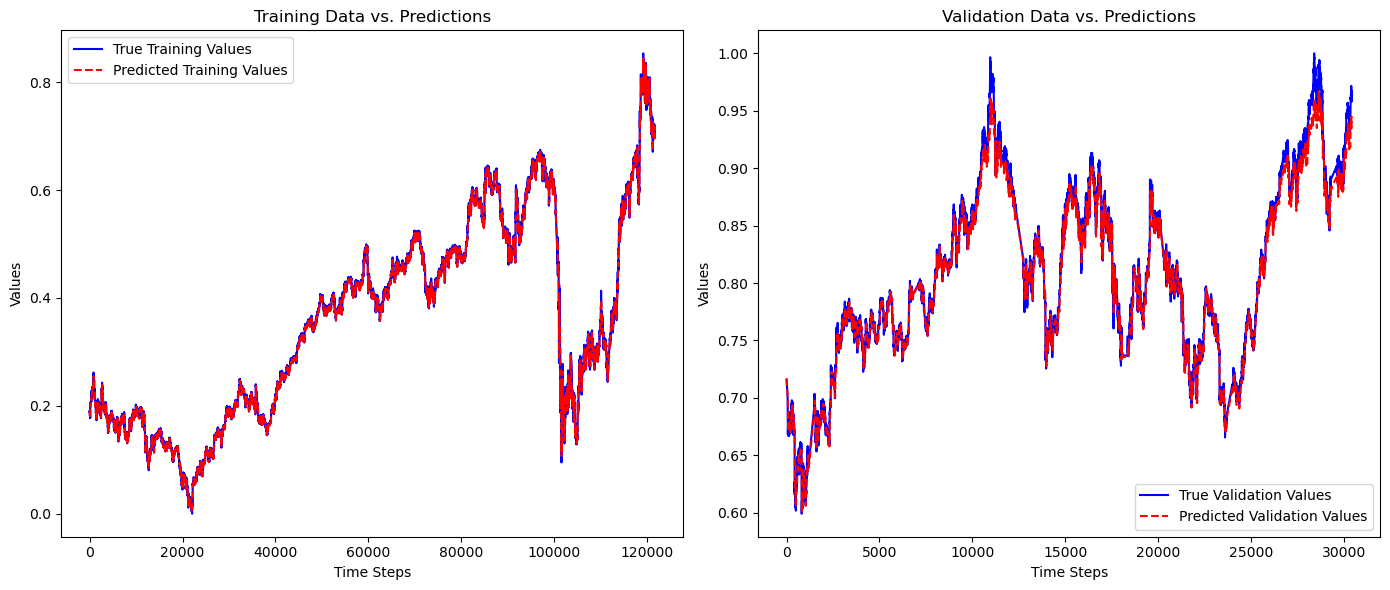

In [358]:


# Assuming data was normalized, and you need to denormalize predictions (optional):
# If not normalized, you can skip this step.
# Example: y_train and y_test normalization, where min_val and max_val are the original data range
# y_train = (y_train - min_val) / (max_val - min_val)
# To denormalize predictions:
# Train_pred = Train_pred * (max_val - min_val) + min_val
# Val_pred = Val_pred * (max_val - min_val) + min_val

# Plot Training Data
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(y_train)), y_train, label='True Training Values', color='blue')
plt.plot(range(len(Train_pred)), Train_pred, label='Predicted Training Values', color='red', linestyle='--')
plt.title('Training Data vs. Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()

# Plot Validation Data
plt.subplot(1, 2, 2)
plt.plot(range(len(y_test)), y_test, label='True Validation Values', color='blue')
plt.plot(range(len(Val_pred)), Val_pred, label='Predicted Validation Values', color='red', linestyle='--')
plt.title('Validation Data vs. Predictions')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()



In [360]:
print(len(Val_pred.flatten().tolist()))

30430


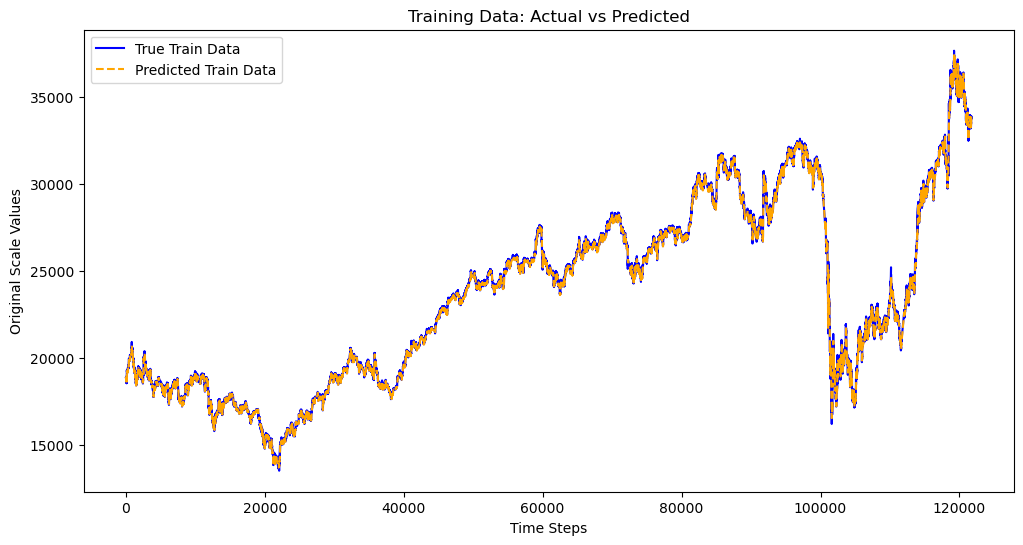

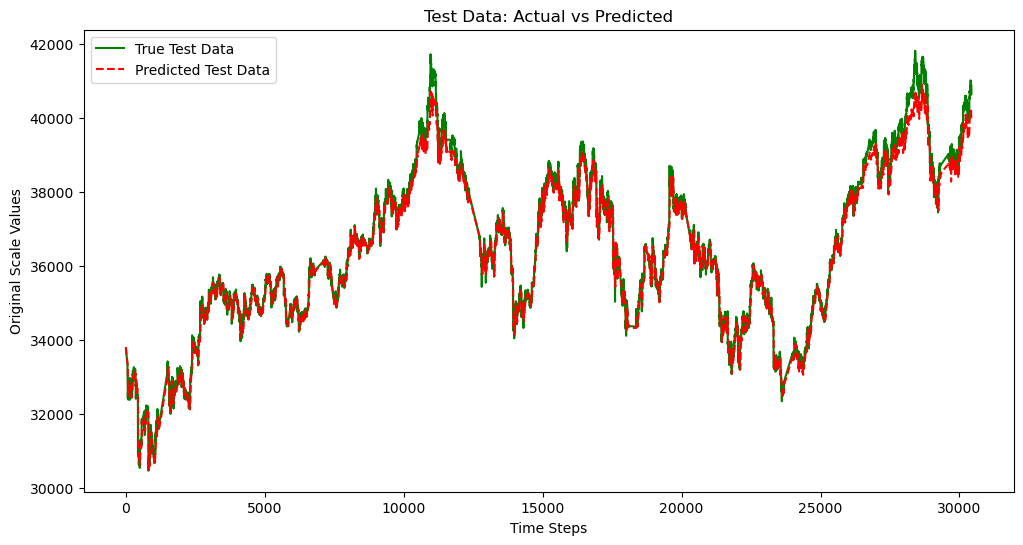

In [378]:
# Assuming you used MinMaxScaler for scaling
# Inverse transform predictions and true values
Train_pred_inv = scaler.inverse_transform(Train_pred)
Val_pred_inv = scaler.inverse_transform(Val_pred)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plotting the training data
plt.figure(figsize=(12, 6))
plt.plot(y_train_inv, label="True Train Data", color="blue")
plt.plot(Train_pred_inv, label="Predicted Train Data", color="orange", linestyle="--")
plt.title("Training Data: Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Original Scale Values")
plt.legend()
plt.show()

# Plotting the validation/test data
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label="True Test Data", color="green")
plt.plot(Val_pred_inv, label="Predicted Test Data", color="red", linestyle="--")
plt.title("Test Data: Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Original Scale Values")
plt.legend()
plt.show()
